# `Data Preprocessing`

## Importing the libraries

In [1]:
import numpy as np                         # numpy deals with arrays
import matplotlib.pyplot as plt            # pyplot deals with graphs and charts
import pandas as pd                        # pandas deals with dataset
import seaborn as sns                      # seaborn also deals with graphs and charts

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')      # Reading the training data directly
X = dataset.iloc[:, :-2].values
y1 = dataset.iloc[:, -2].values      # Binary data : model-1
y2 = dataset.iloc[:, -1].values      # Four class data : model-2
display(dataset)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [3]:
print(X)

[[0.50364388 0.74719322 0.4301753  ... 0.13179003 0.1281856  1.67565235]
 [0.51461708 0.68906355 0.41177034 ... 0.13510297 0.1311187  1.74360965]
 [0.50918309 0.7302468  0.41830878 ... 0.13336183 0.12743108 1.92642659]
 ...
 [0.38218182 0.58654545 0.31854545 ... 0.16364894 0.19121209 1.43351401]
 [0.3656217  0.57220852 0.29799225 ... 0.1406397  0.21389934 1.54327375]
 [0.36560487 0.59949893 0.30153901 ... 0.16626766 0.2061288  1.52011013]]


# Exploratory Data Analysis

In [4]:
# Printing the datatype of each column
print(dataset.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [5]:
# Checking for unique values and null entries in the dataset
for col in dataset.columns.values:
  values = pd.unique(dataset[col])         # Making a list of unique values
  print(col + ' has ' + str(len(values)) + ' unique values, and ' + str(dataset[col].isna().sum()) + ' null entries' )     # counting unique values and null entries of columns of tain data


DYRK1A_N has 762 unique values, and 0 null entries
ITSN1_N has 761 unique values, and 0 null entries
BDNF_N has 762 unique values, and 0 null entries
NR1_N has 762 unique values, and 0 null entries
NR2A_N has 762 unique values, and 0 null entries
pAKT_N has 762 unique values, and 0 null entries
pBRAF_N has 760 unique values, and 0 null entries
pCAMKII_N has 762 unique values, and 0 null entries
pCREB_N has 762 unique values, and 0 null entries
pELK_N has 762 unique values, and 0 null entries
pERK_N has 762 unique values, and 0 null entries
pJNK_N has 761 unique values, and 0 null entries
PKCA_N has 762 unique values, and 0 null entries
pMEK_N has 762 unique values, and 0 null entries
pNR1_N has 762 unique values, and 0 null entries
pNR2A_N has 762 unique values, and 0 null entries
pNR2B_N has 762 unique values, and 0 null entries
pPKCAB_N has 762 unique values, and 0 null entries
pRSK_N has 762 unique values, and 0 null entries
AKT_N has 762 unique values, and 0 null entries
BRAF_N has

Observations:
1. Last two columns are object having two and four unique values respectively. We will do Label Encoding for them.
2. Null entries will be imputed.


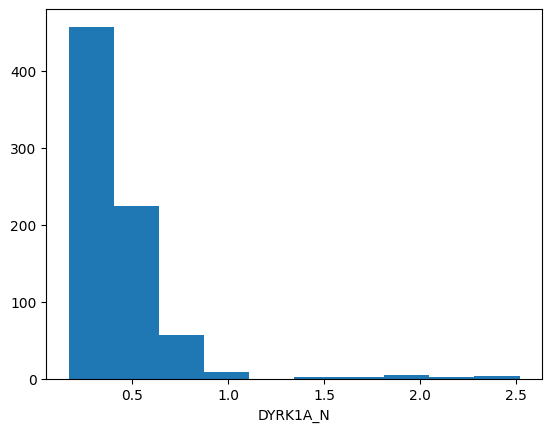

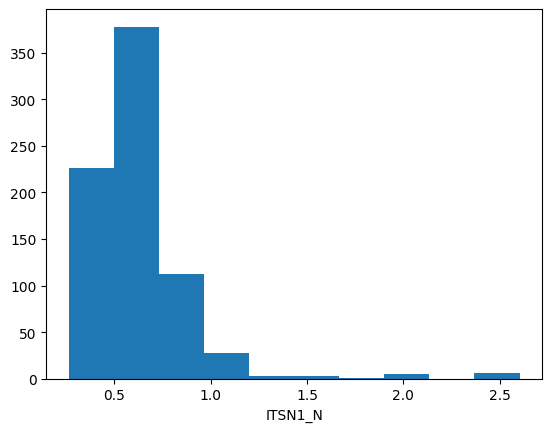

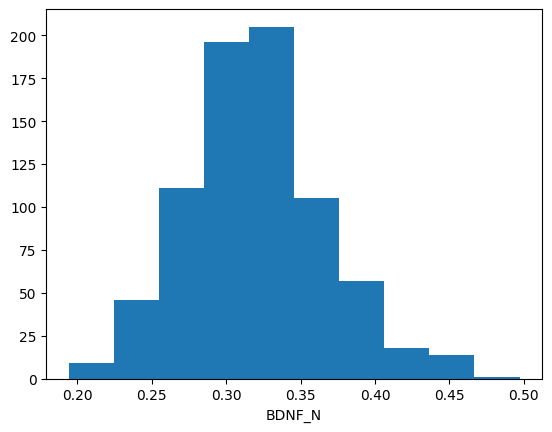

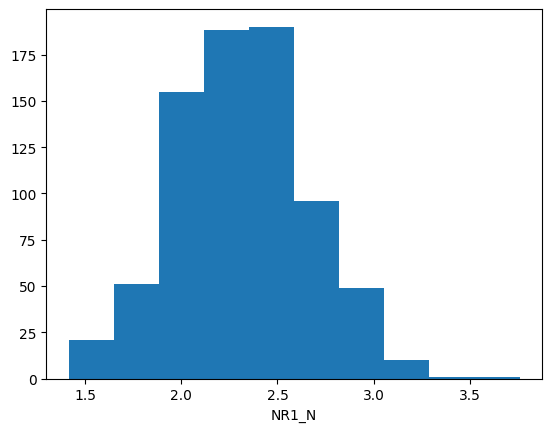

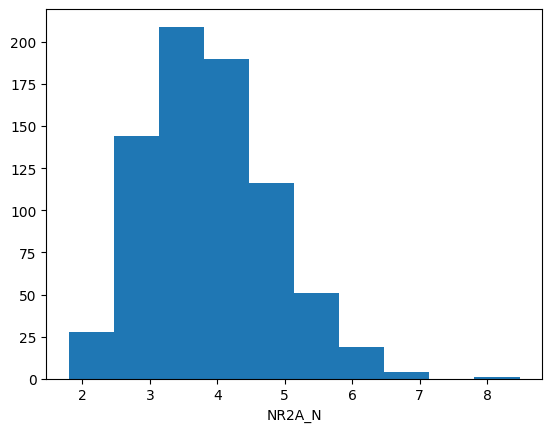

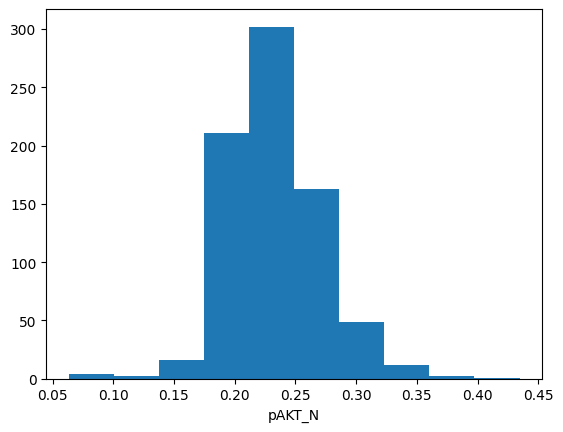

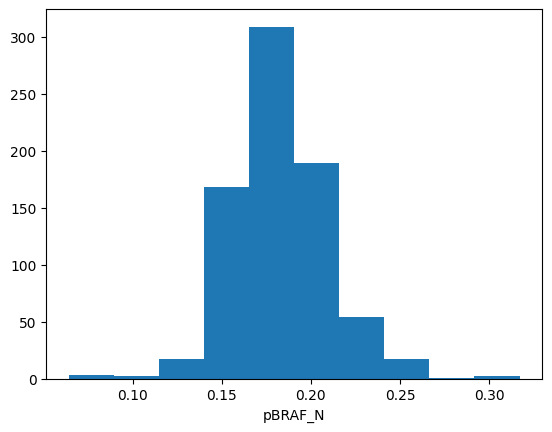

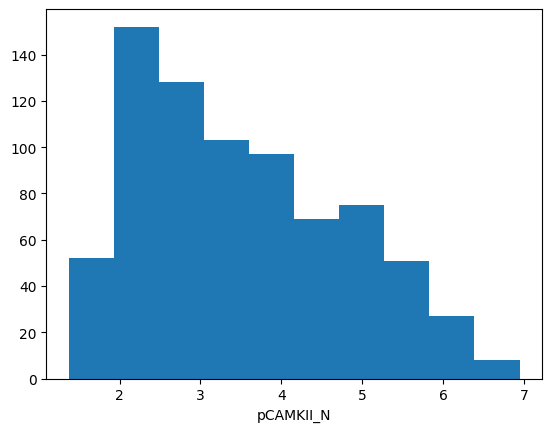

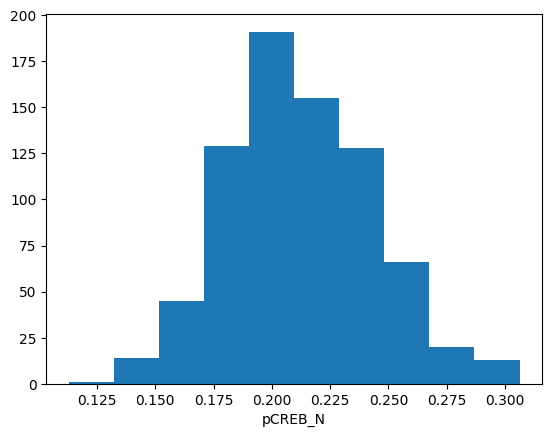

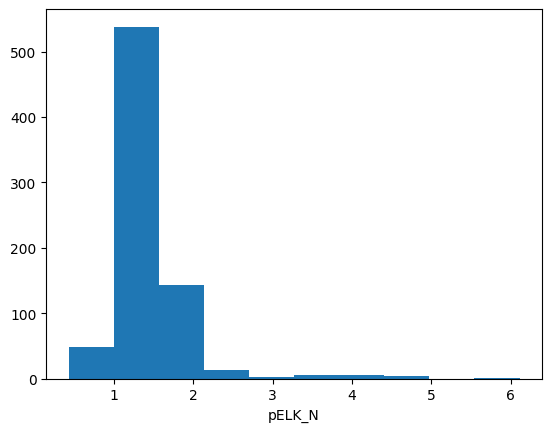

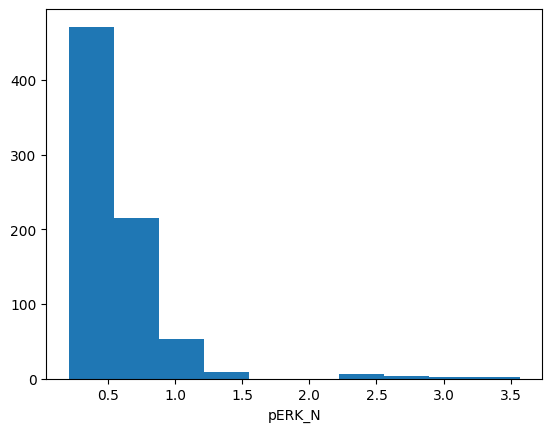

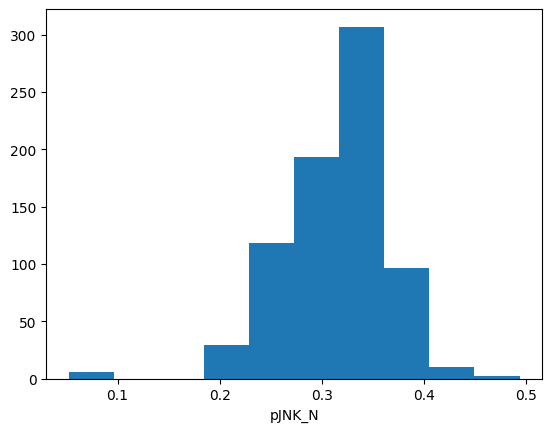

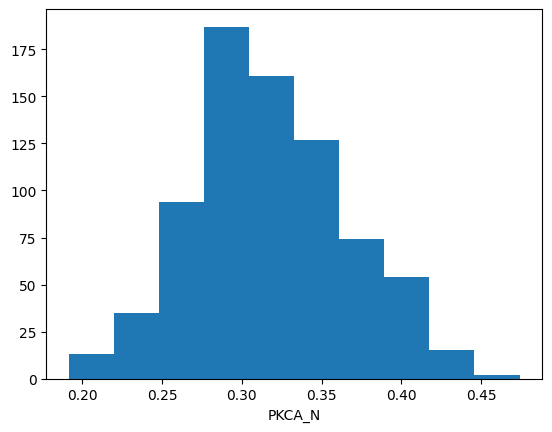

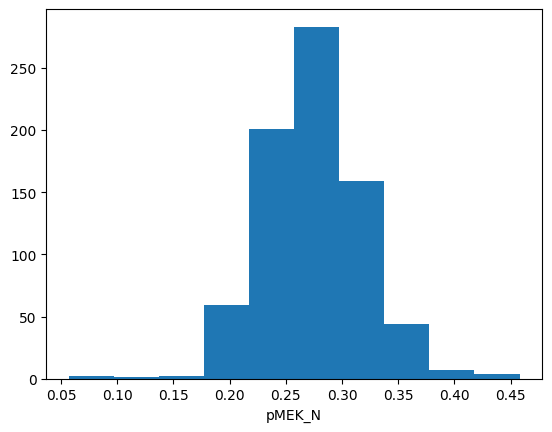

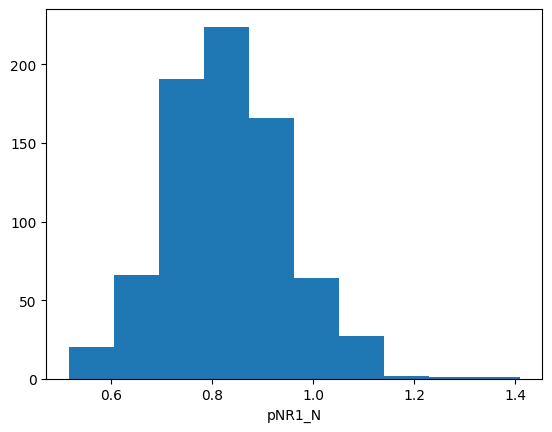

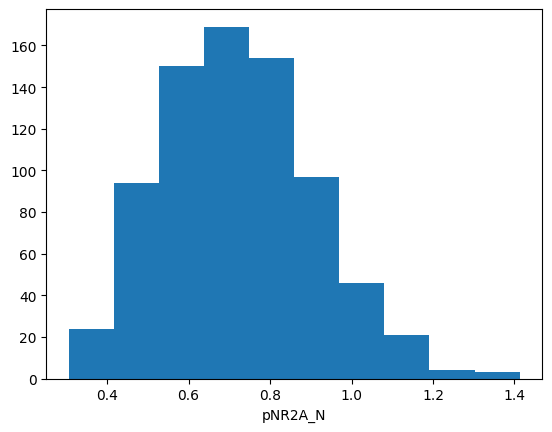

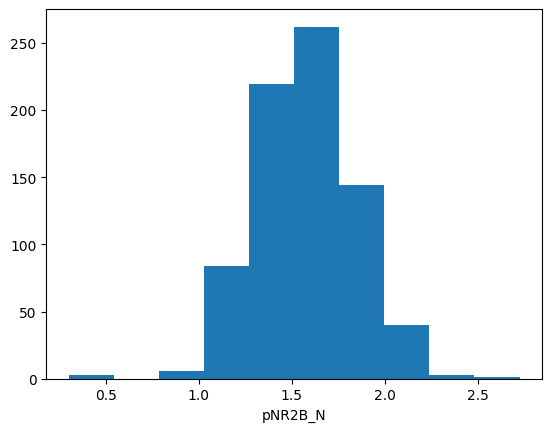

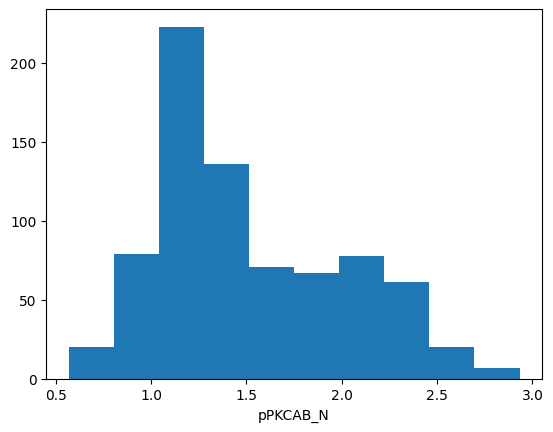

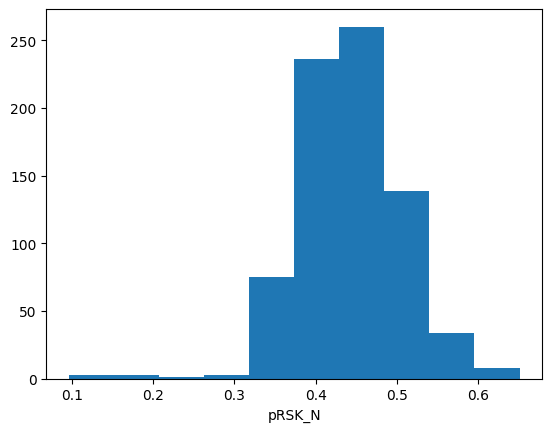

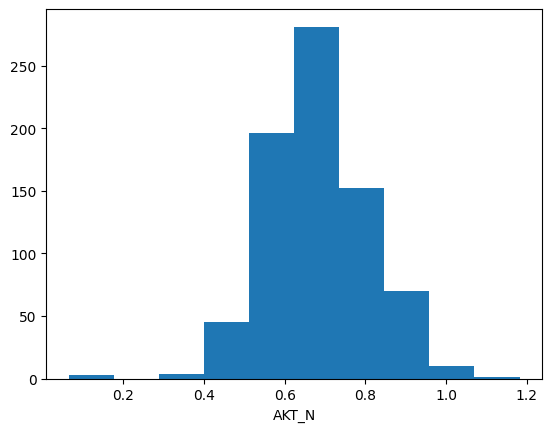

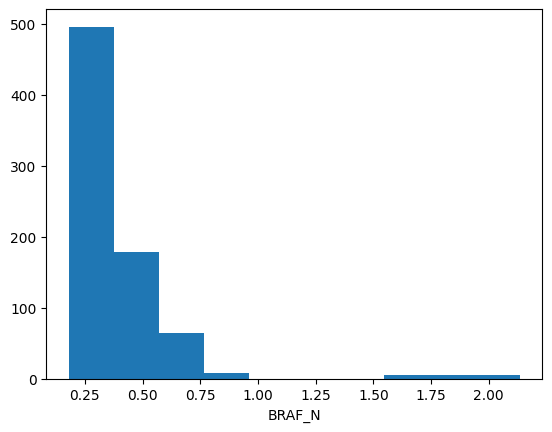

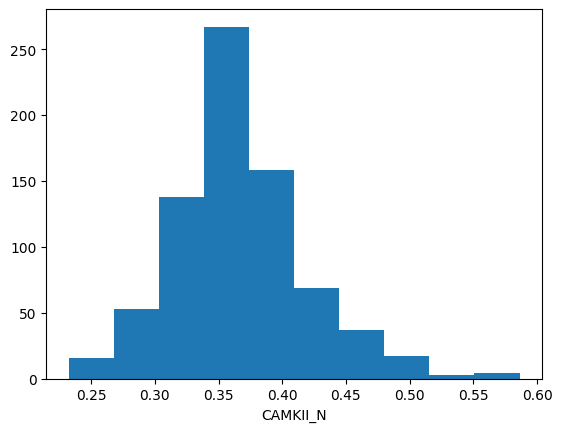

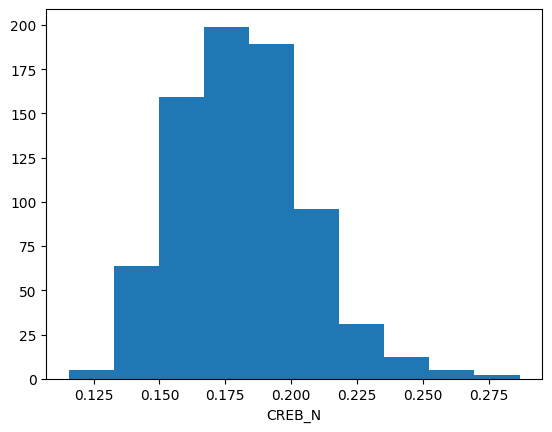

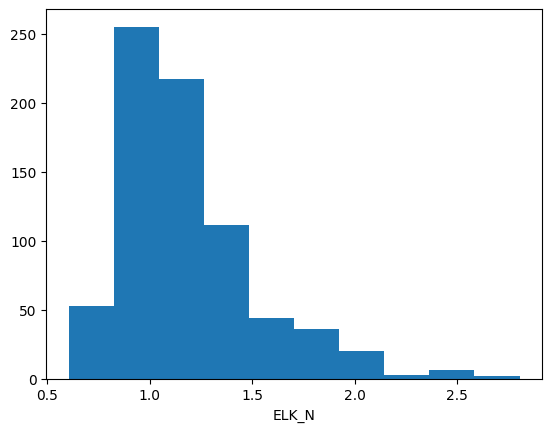

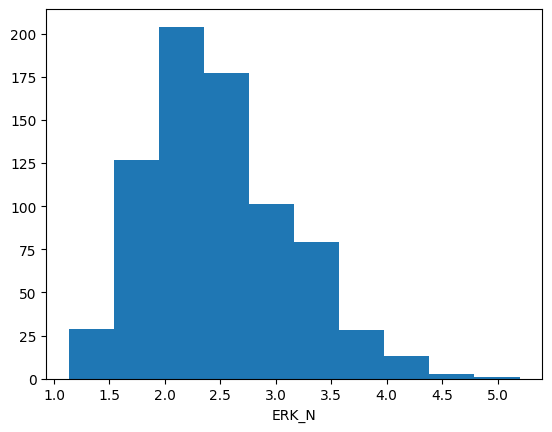

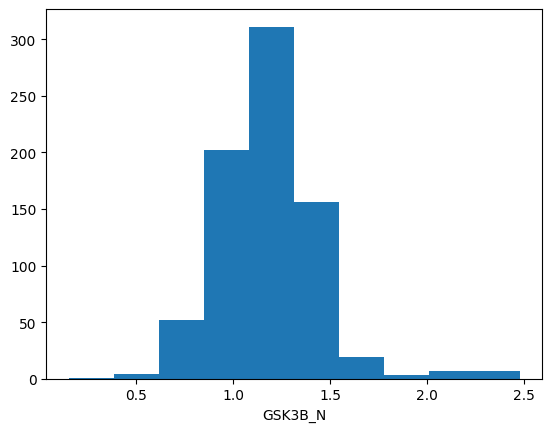

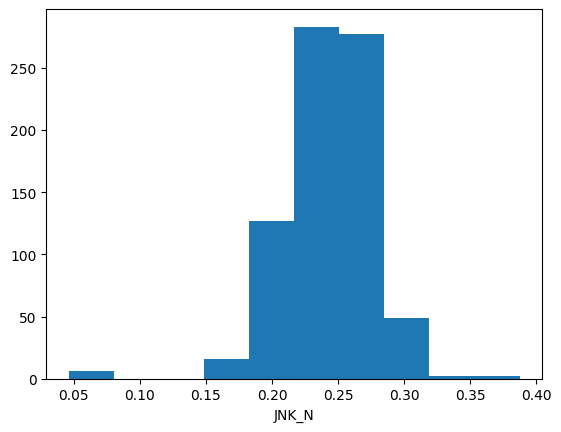

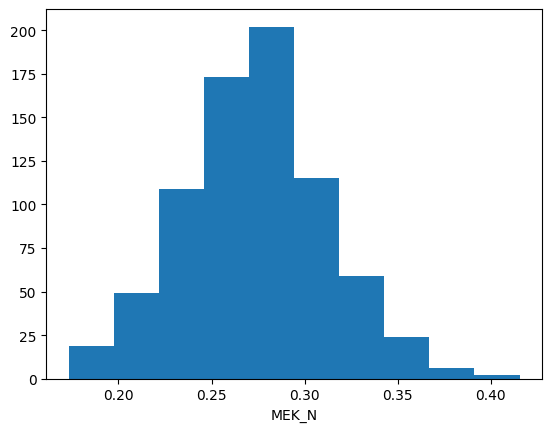

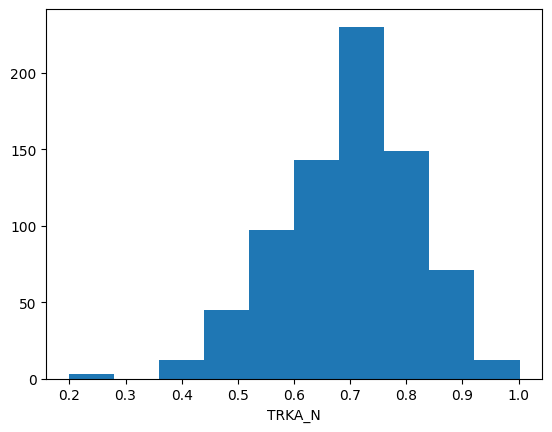

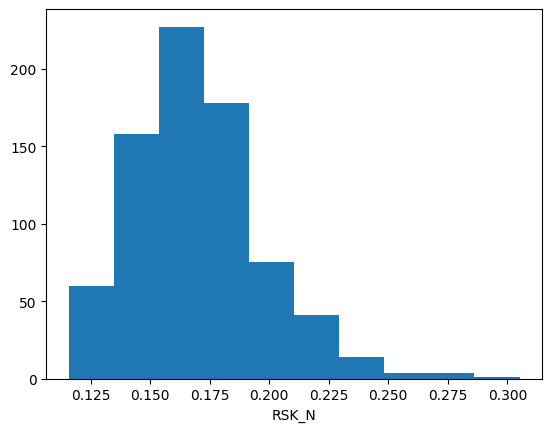

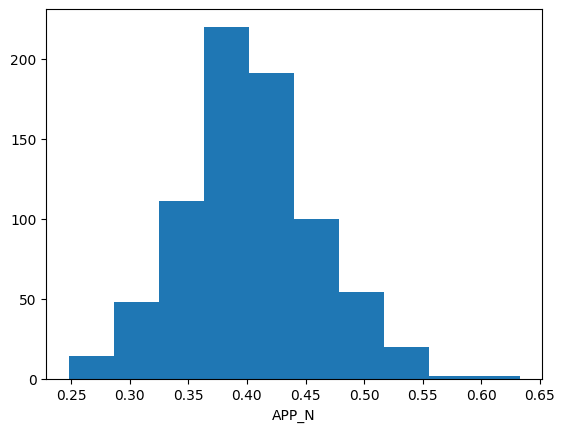

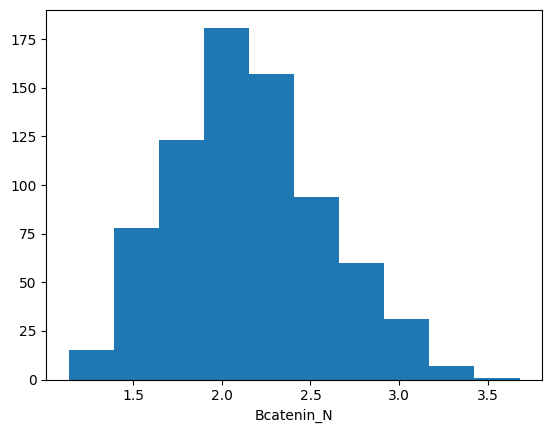

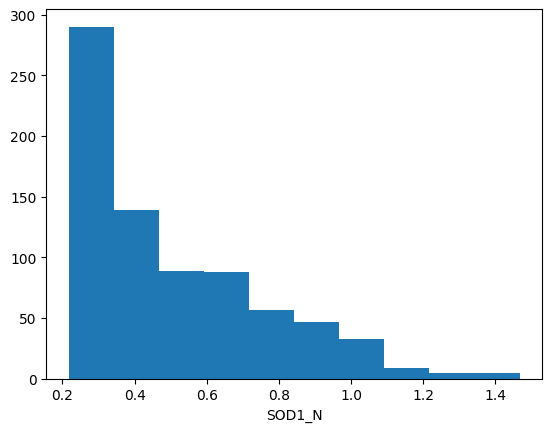

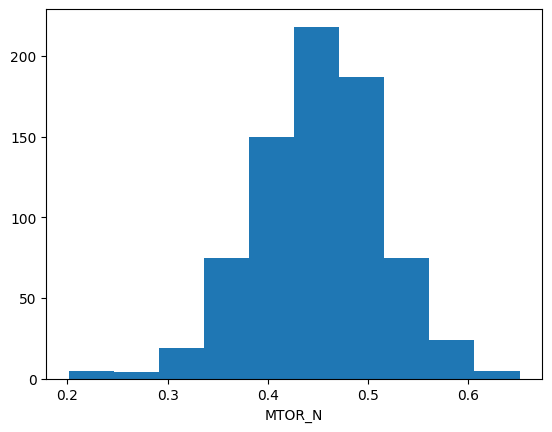

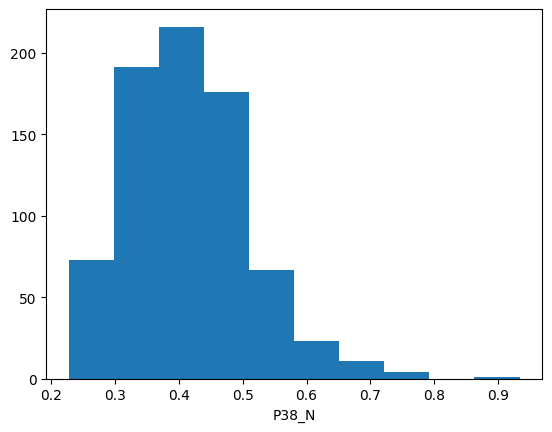

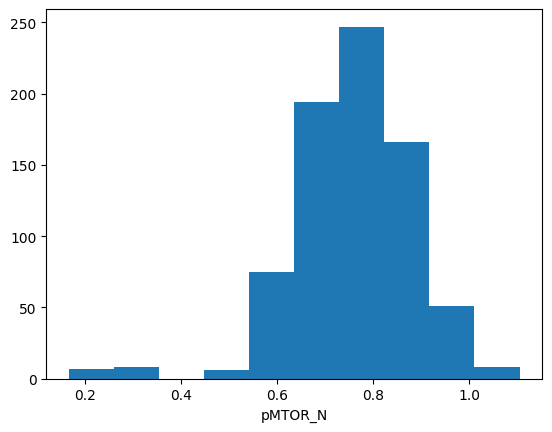

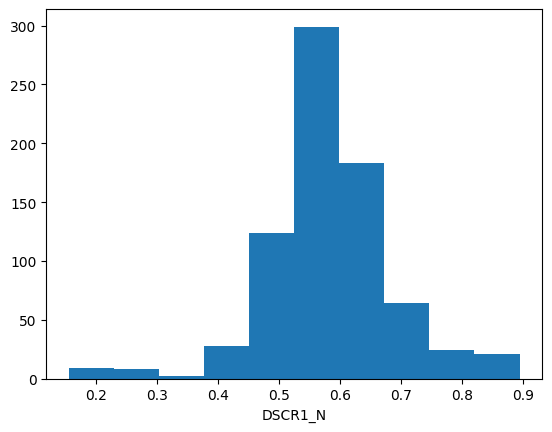

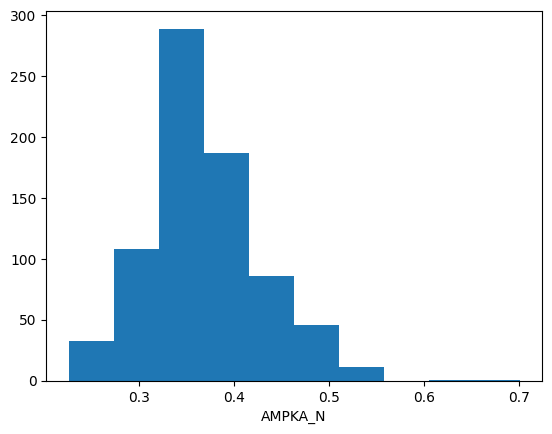

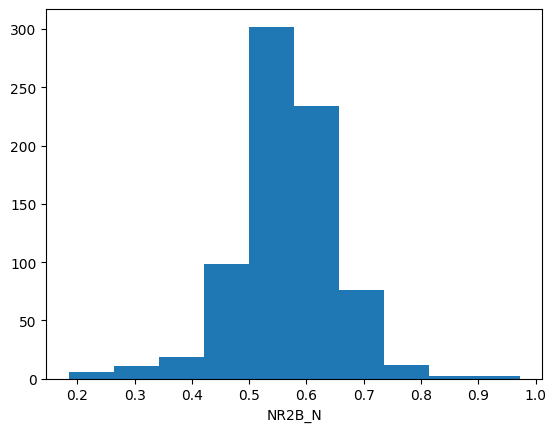

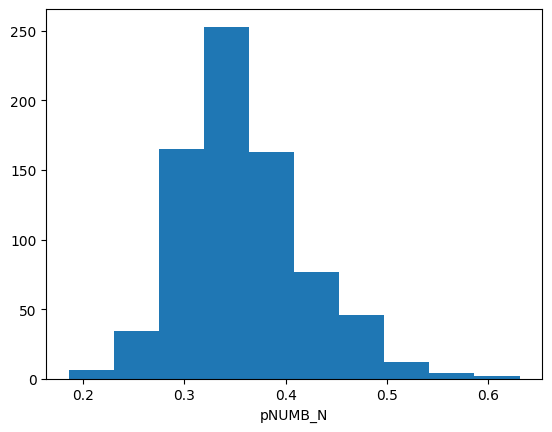

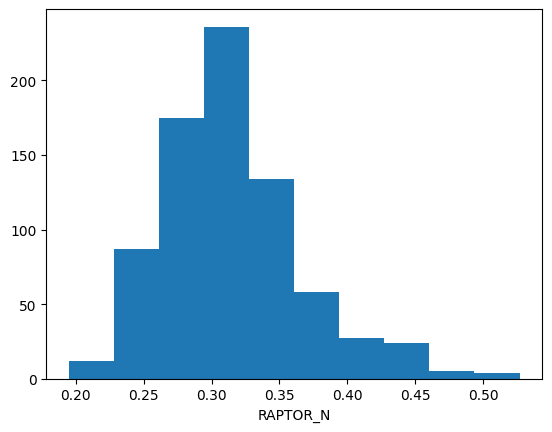

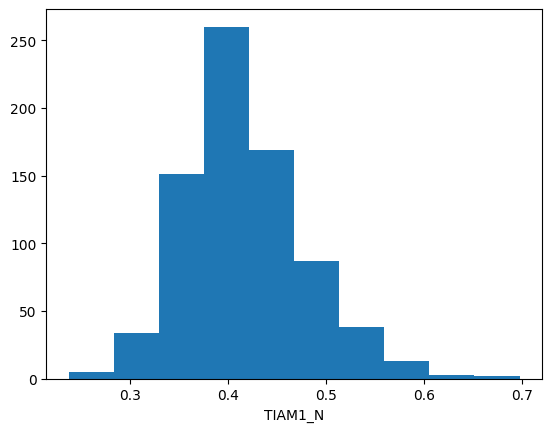

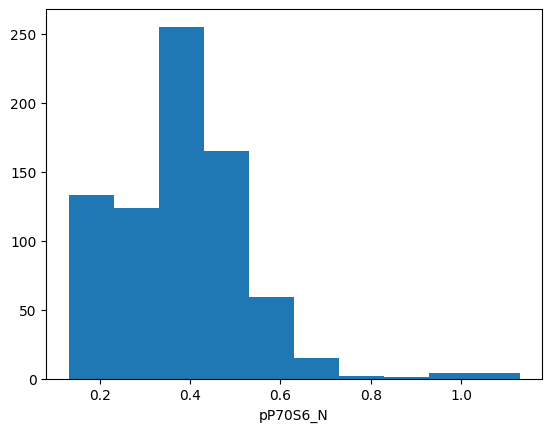

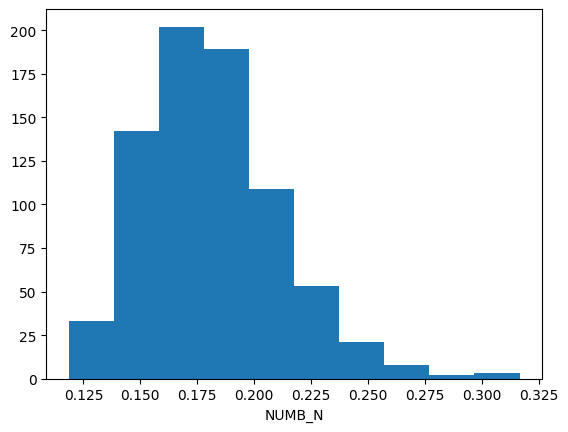

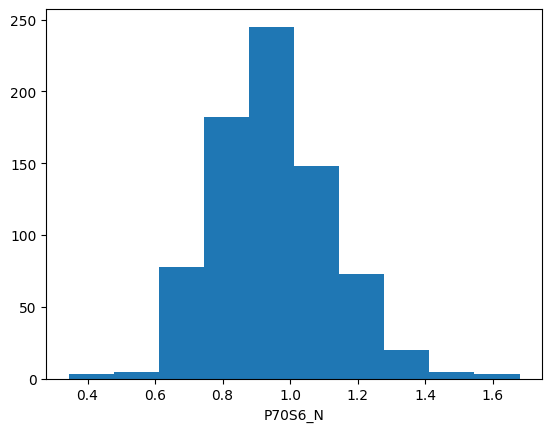

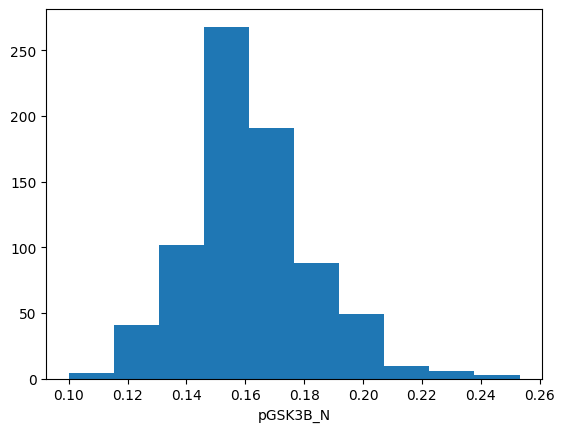

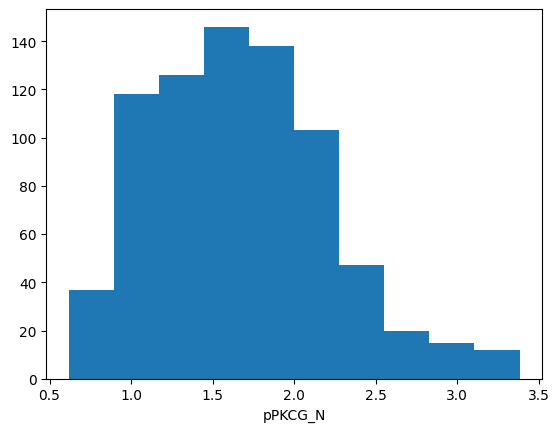

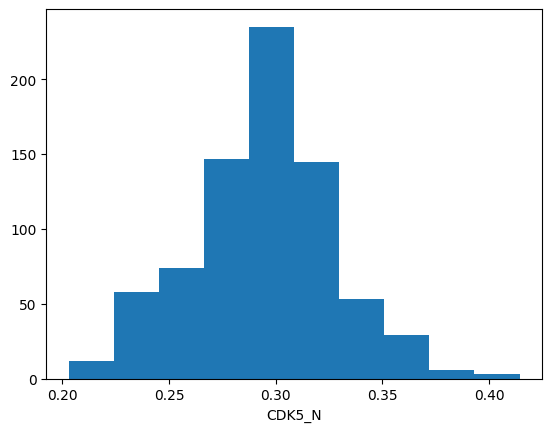

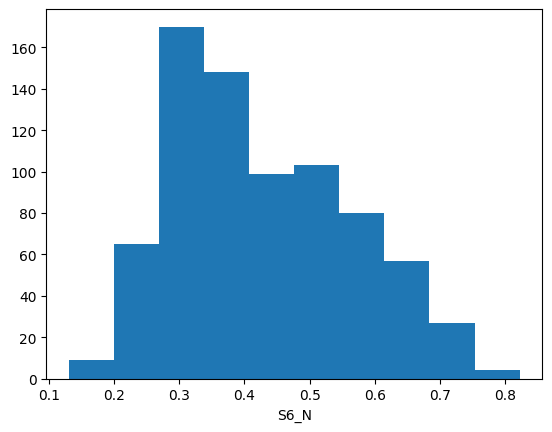

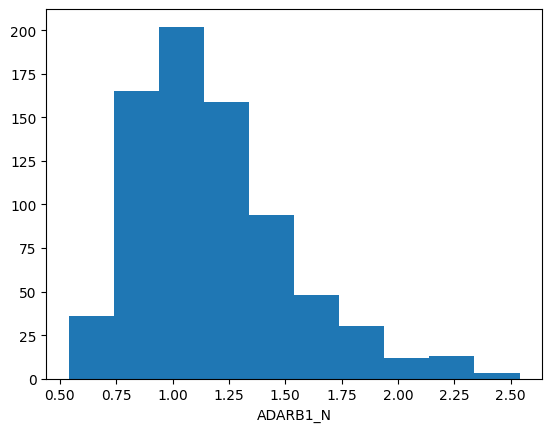

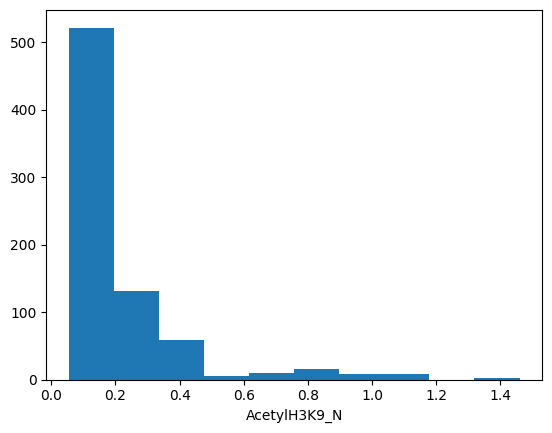

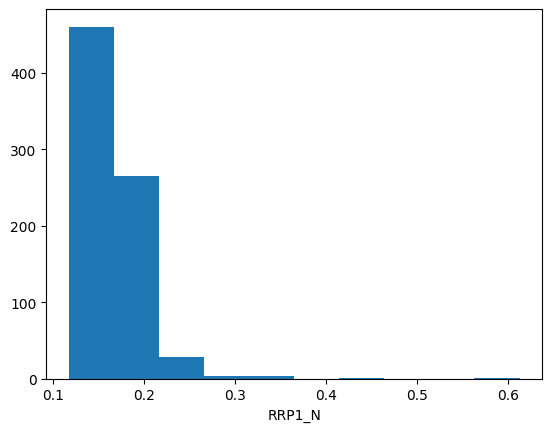

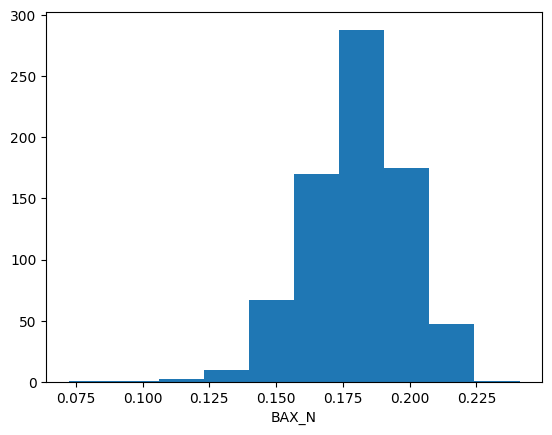

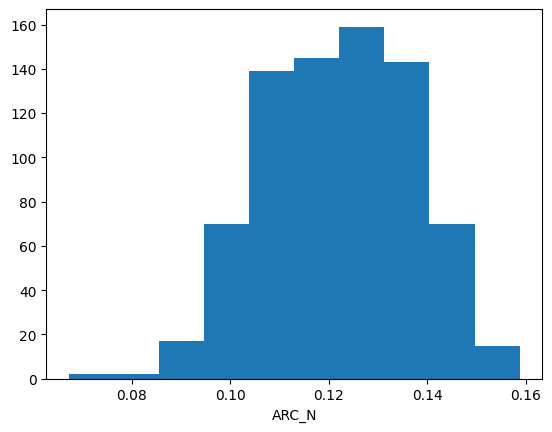

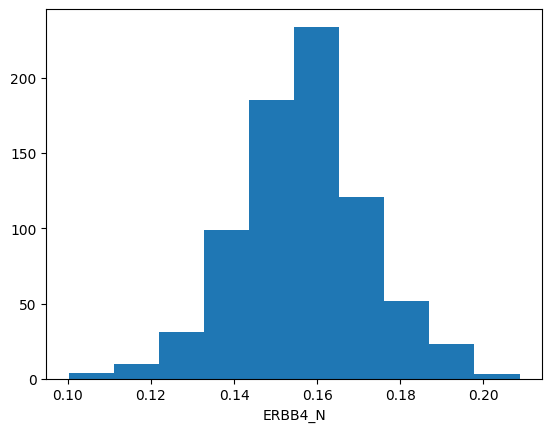

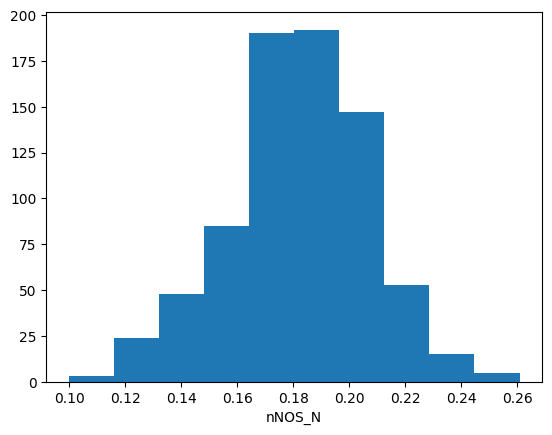

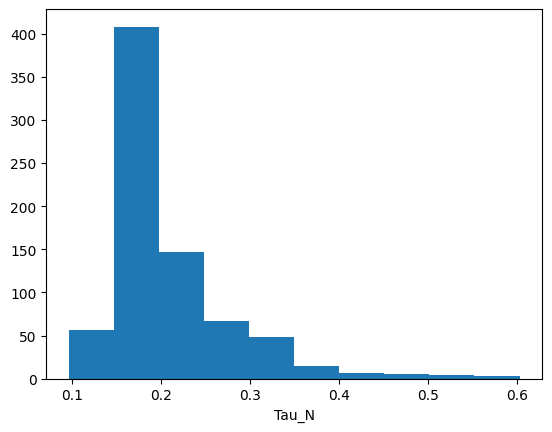

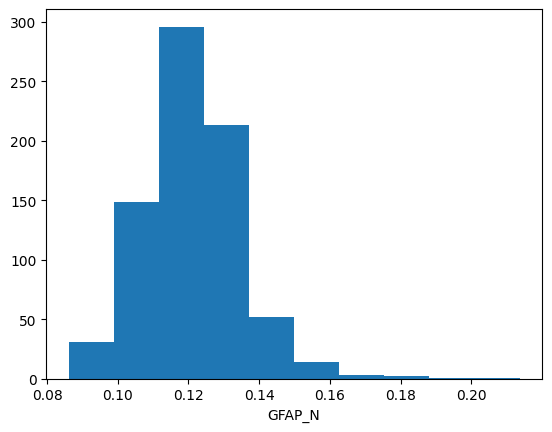

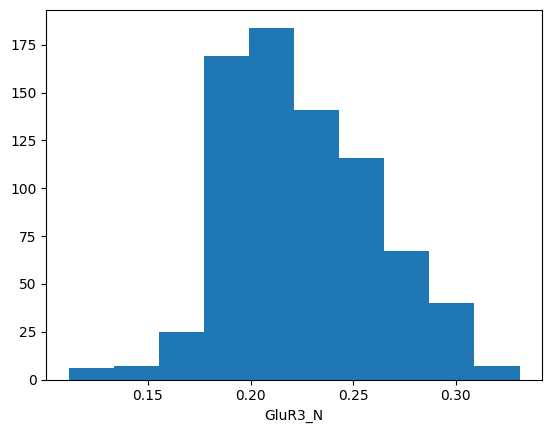

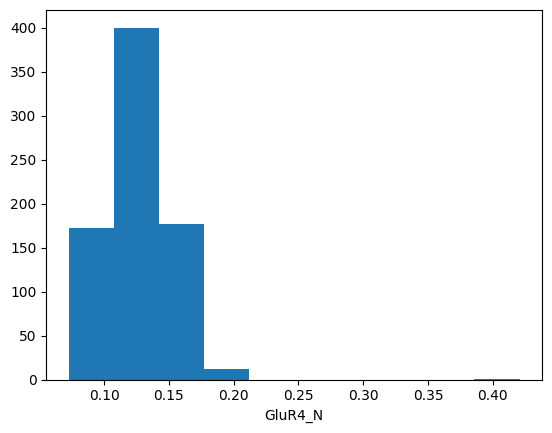

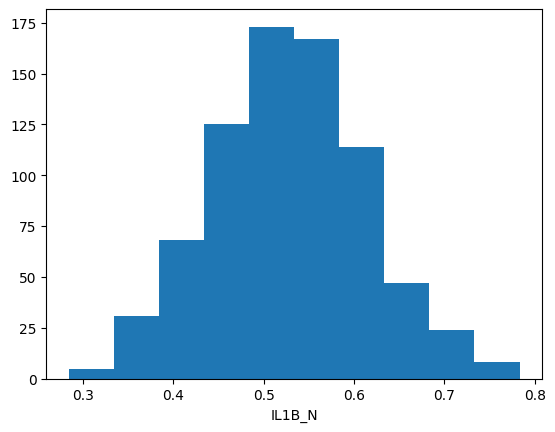

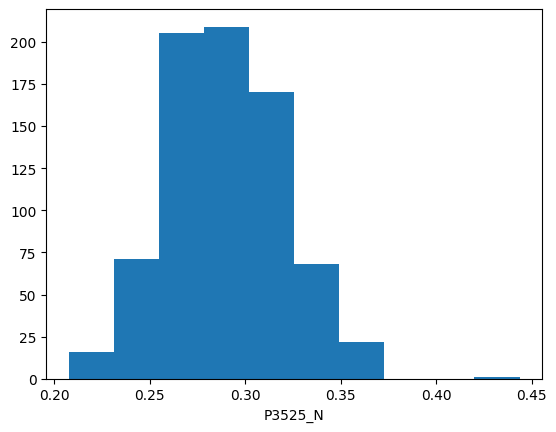

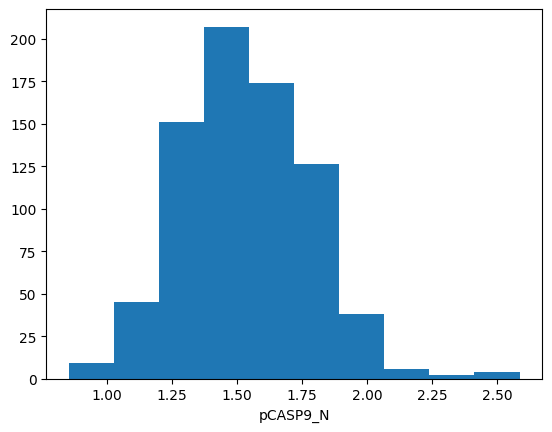

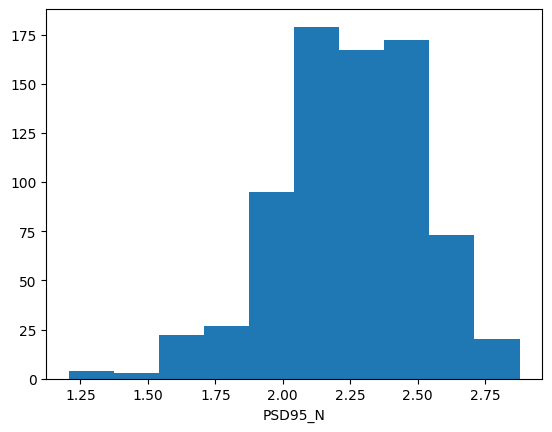

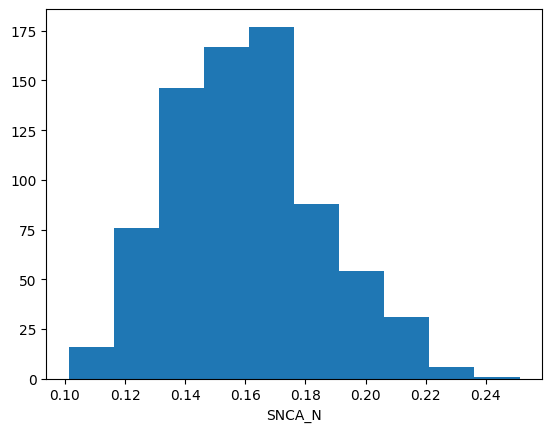

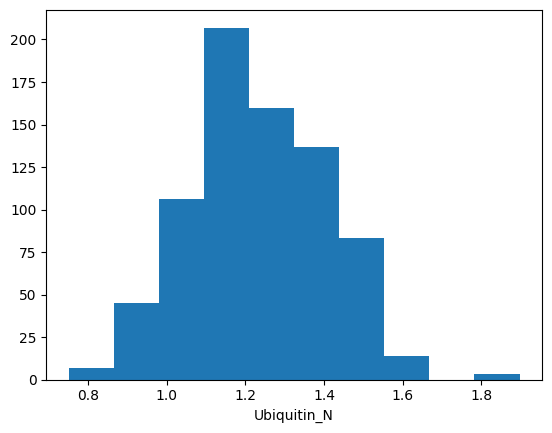

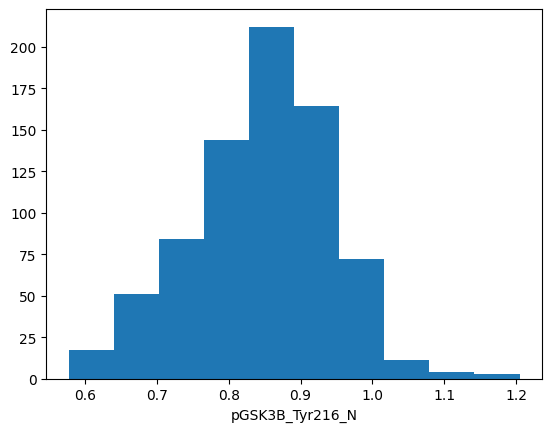

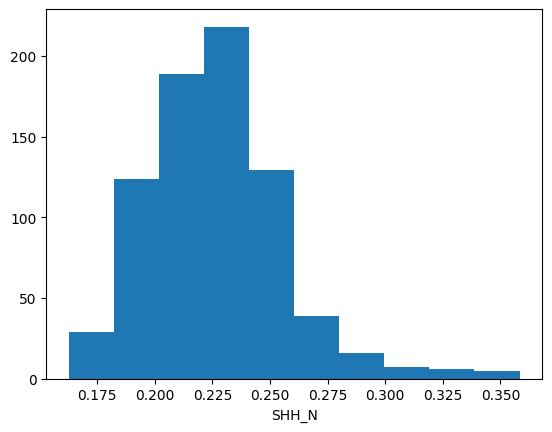

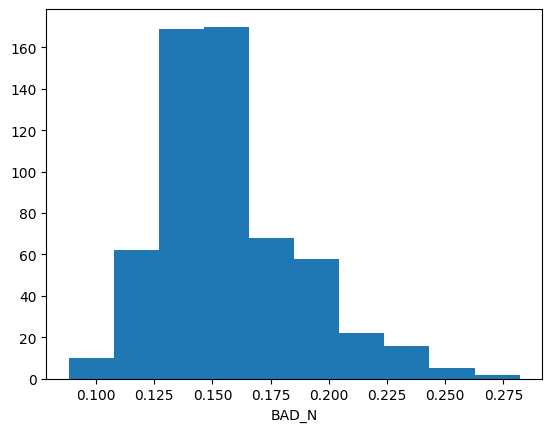

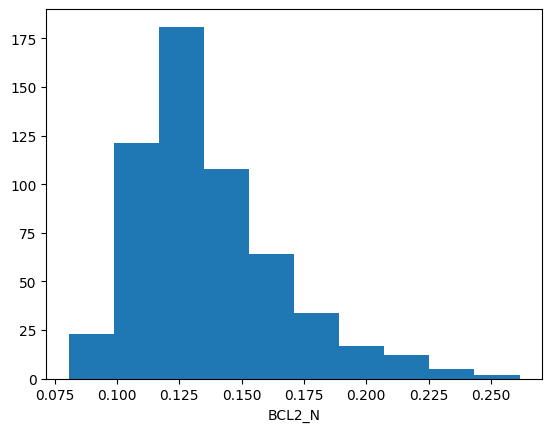

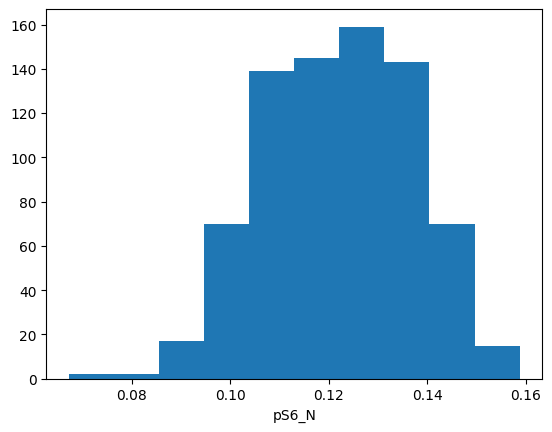

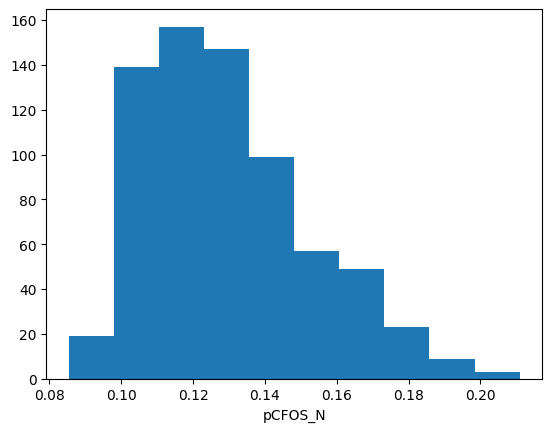

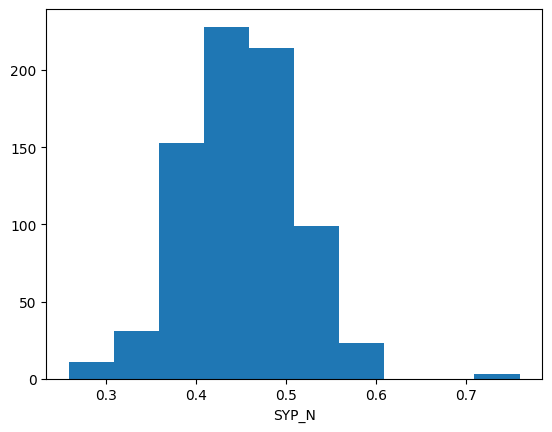

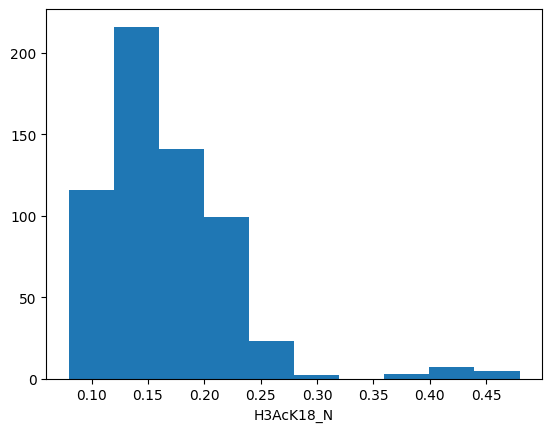

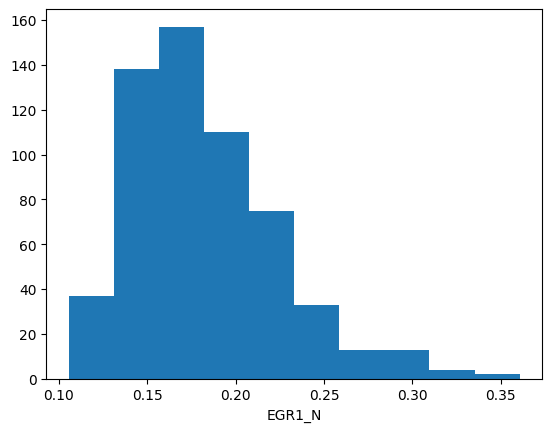

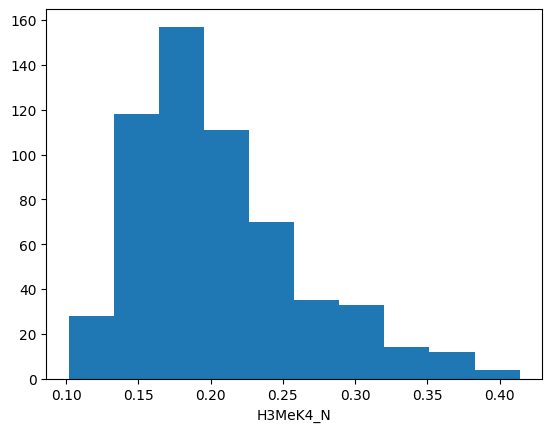

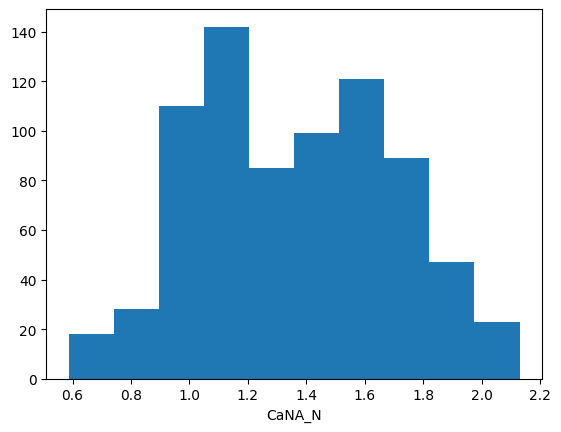

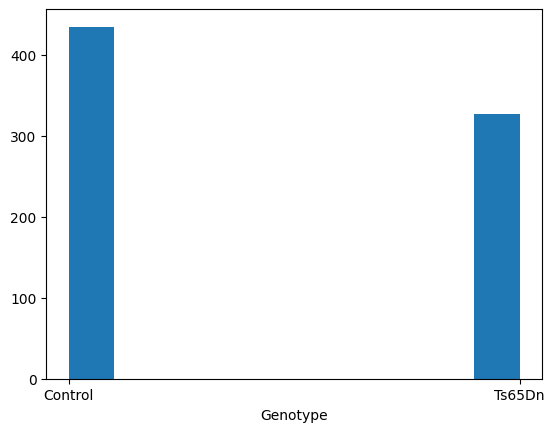

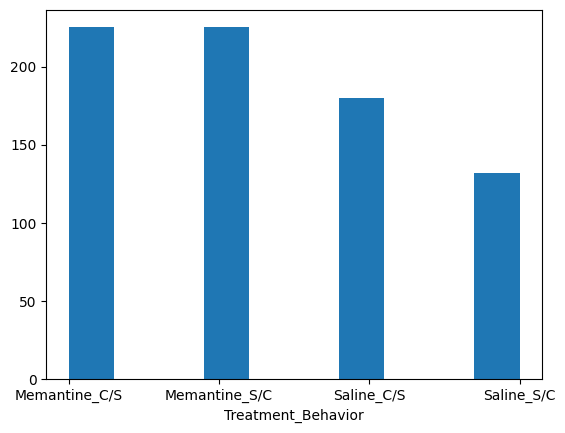

In [6]:
# Plottting the distribution of various variables
for col in dataset.columns.values:
  plt.hist(dataset[col])
  plt.xlabel(col)
  plt.show()

Observations:
1. Some columns are skewed towards left side.
2. Most of the variables are perfectly distributed.
3. Variables "Genotype" and "Treatment_Behaviour" being object has two and four unique values respectively.

<ipython-input-7-fed2dc03f792>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coMat = dataset.corr(method = 'spearman')      # Spearman method for non-linear correlation


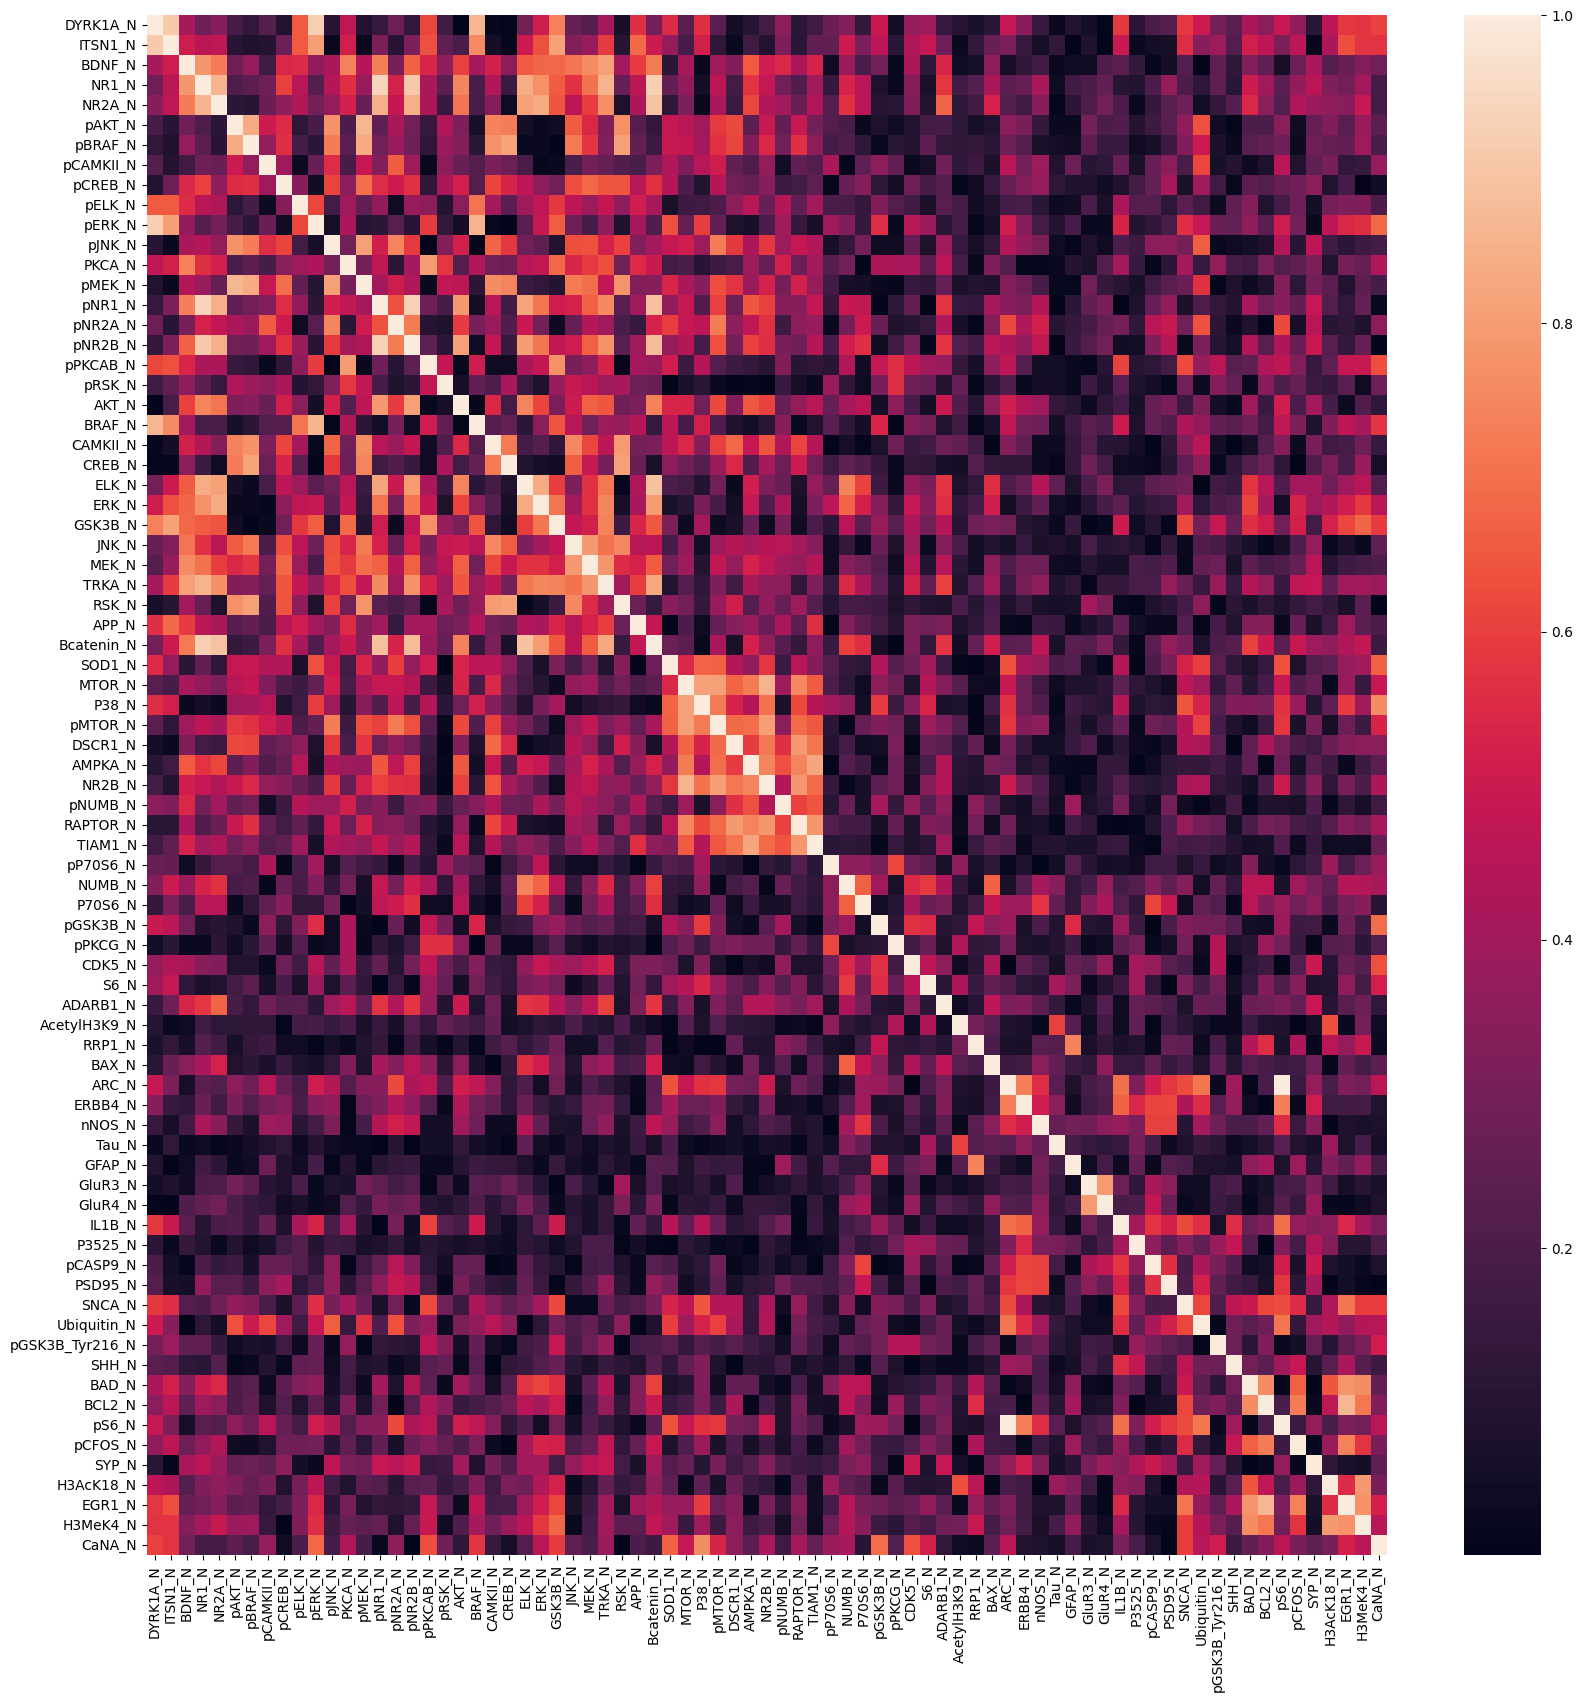

In [7]:
#Plotting the correlation heatmap
coMat = dataset.corr(method = 'spearman')      # Spearman method for non-linear correlation
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(abs(coMat), annot = False)        # Plotting absolute values so that perfectly positive and perfectly negaive correlation are plotted in the same way
plt.show()

Observations:
1. "DYRK1A_N" and "ITSN1_N" are highly correlated.
2. "NR1N" and "NR2AN" are highly correlated.
3. "pAKT_N" and "pBRAF_N" are highly correlated.
4. "ELK_N" and "ERK_N" are highly correlated.
5. Can eliminate any one variable in each pair above.

In [8]:
# Eliminating highly correlated data
dataset = dataset.drop(['ITSN1_N', 'NR2A_N', 'pBRAF_N', 'ERK_N'], axis = 1)
display(dataset)

,DYRK1A_N,BDNF_N,NR1_N,pAKT_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,0.218830,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,0.211636,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,0.209011,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,0.222886,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,0.213106,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,0.234529,3.208804,0.221809,1.218951,0.467915,0.317851,0.306417,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.321841,2.183930,0.236546,3.384350,0.231899,1.250487,0.476240,0.329786,0.323939,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.318545,2.072000,0.259636,3.006364,0.223455,1.248727,0.442727,0.354545,0.324182,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.297992,2.004931,0.245333,2.948221,0.217506,1.177527,0.432371,0.325819,0.310497,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


## Taking care of missing data

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[0.50364388 0.74719322 0.4301753  ... 0.13179003 0.1281856  1.67565235]
 [0.51461708 0.68906355 0.41177034 ... 0.13510297 0.1311187  1.74360965]
 [0.50918309 0.7302468  0.41830878 ... 0.13336183 0.12743108 1.92642659]
 ...
 [0.38218182 0.58654545 0.31854545 ... 0.16364894 0.19121209 1.43351401]
 [0.3656217  0.57220852 0.29799225 ... 0.1406397  0.21389934 1.54327375]
 [0.36560487 0.59949893 0.30153901 ... 0.16626766 0.2061288  1.52011013]]


# Encoding Categorical Data

In [10]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()            # Object of class LabelEncoder
y1 = le1.fit_transform(y1)      # Encoding binary data
le2 = LabelEncoder()            # Object of class LabelEncoder
y2 = le2.fit_transform(y2)      # Encoding four class data


# Training and Validation of data on different models

In [11]:
# Importing libraries
from sklearn.linear_model import LogisticRegression    # Logistic Regression
from sklearn.neural_network import MLPClassifier       # Neural Network classifier
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier    # Random Forest Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
# Creating the different models and their parameters dictionary
model_params = {
    # Logistic regression model
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.01, 0.1, 1, 10, 20, 30],
            'l1_ratio' : np.arange(0.1,0.8,0.2)
        }

    },

    # Neural Network with single hidden layer
     'MLPClassifier' :{
        'model': MLPClassifier( max_iter=2000, activation = 'relu', solver='adam', random_state= 42),
        'params':{
            'hidden_layer_sizes': np.arange(10,70,10),
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
        }
    },

    # SVM Classifier
     'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 2, 4, 6, 8, 10],
            'kernel': ['rbf', 'linear', 'poly'],
            'degree' : [3, 5, 8]

        }
    },


    # Random Forest Classifier
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100, 150, 200],
            'max_depth': [10, 20, 30, 40, 50]
        }
    }

}

In [13]:
# Performing GridSearchCV in different models
# Initializing arrays to display parameters
score1 = []
score2 = []

# GridSearchCV
for model_name, mp in model_params.items():
    clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)    # For Binary Data 5-fold cross validation
    clf2 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)    # For four class data 5-fold cross validation
    clf1.fit(X, y1)
    clf2.fit(X, y2)
    score1.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })

    score2.append({
        'model': model_name,
        'best_score': clf2.best_score_,
        'best_params': clf2.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

In [14]:
print(np.array(score1))

[{'model': 'logistic_regression', 'best_score': 0.7519005847953217, 'best_params': {'C': 10, 'l1_ratio': 0.1}}
 {'model': 'MLPClassifier', 'best_score': 0.7217320261437908, 'best_params': {'alpha': 0.001, 'hidden_layer_sizes': 40}}
 {'model': 'svm', 'best_score': 0.7663054695562436, 'best_params': {'C': 4, 'degree': 3, 'kernel': 'linear'}}
 {'model': 'random_forest', 'best_score': 0.7322325421396629, 'best_params': {'max_depth': 30, 'n_estimators': 50}}]


In [15]:
print(np.array(score2))

[{'model': 'logistic_regression', 'best_score': 0.694109047127623, 'best_params': {'C': 30, 'l1_ratio': 0.1}}
 {'model': 'MLPClassifier', 'best_score': 0.7361713106295149, 'best_params': {'alpha': 0.01, 'hidden_layer_sizes': 40}}
 {'model': 'svm', 'best_score': 0.7374699002407981, 'best_params': {'C': 10, 'degree': 3, 'kernel': 'linear'}}
 {'model': 'random_forest', 'best_score': 0.6626762985896113, 'best_params': {'max_depth': 50, 'n_estimators': 50}}]


# Check feature importance for each model

[ 0.05550365 14.03948238 -0.32600776 -3.08022502 -0.27696186  2.93939387
  0.19254333 -0.49869853  2.02017144 -1.84352249 -1.21257282  0.77015838
  1.79634141  0.79857698 -4.56763187 -1.3941333   5.27446758 -0.63513409
 -2.42148717  1.36021237 -7.57732498 -0.84982368 -0.43599337 -1.73892117
 -3.651955    0.38904193  0.82131531  2.4152212  10.79309365  0.15794052
 15.73985703 -0.20606389 -0.12542082 -4.33881751 -2.75783603 -0.70752504
  7.16152043 -2.20230081 -2.88783092 -3.71250118 -1.39994671  7.06420252
  1.25418305  1.38921672  2.64902639 -1.46253904  0.87703912 -1.34213649
  3.78378722  1.18368035  1.93815851 -1.29354222 -0.14780343 -0.04176708
  0.80324257  1.9854632   0.85232243 -0.88132217 -7.4654648  -2.34374316
 -3.83521408  1.54652392  1.23525557  1.18921889 -0.2733339   2.23560159
 -4.2582548   0.18739464 -2.99124646  0.92714814 -0.04176708 -1.0144686
 -6.72884463  0.18927861 -3.55700068 -1.8794497   0.6587848 ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


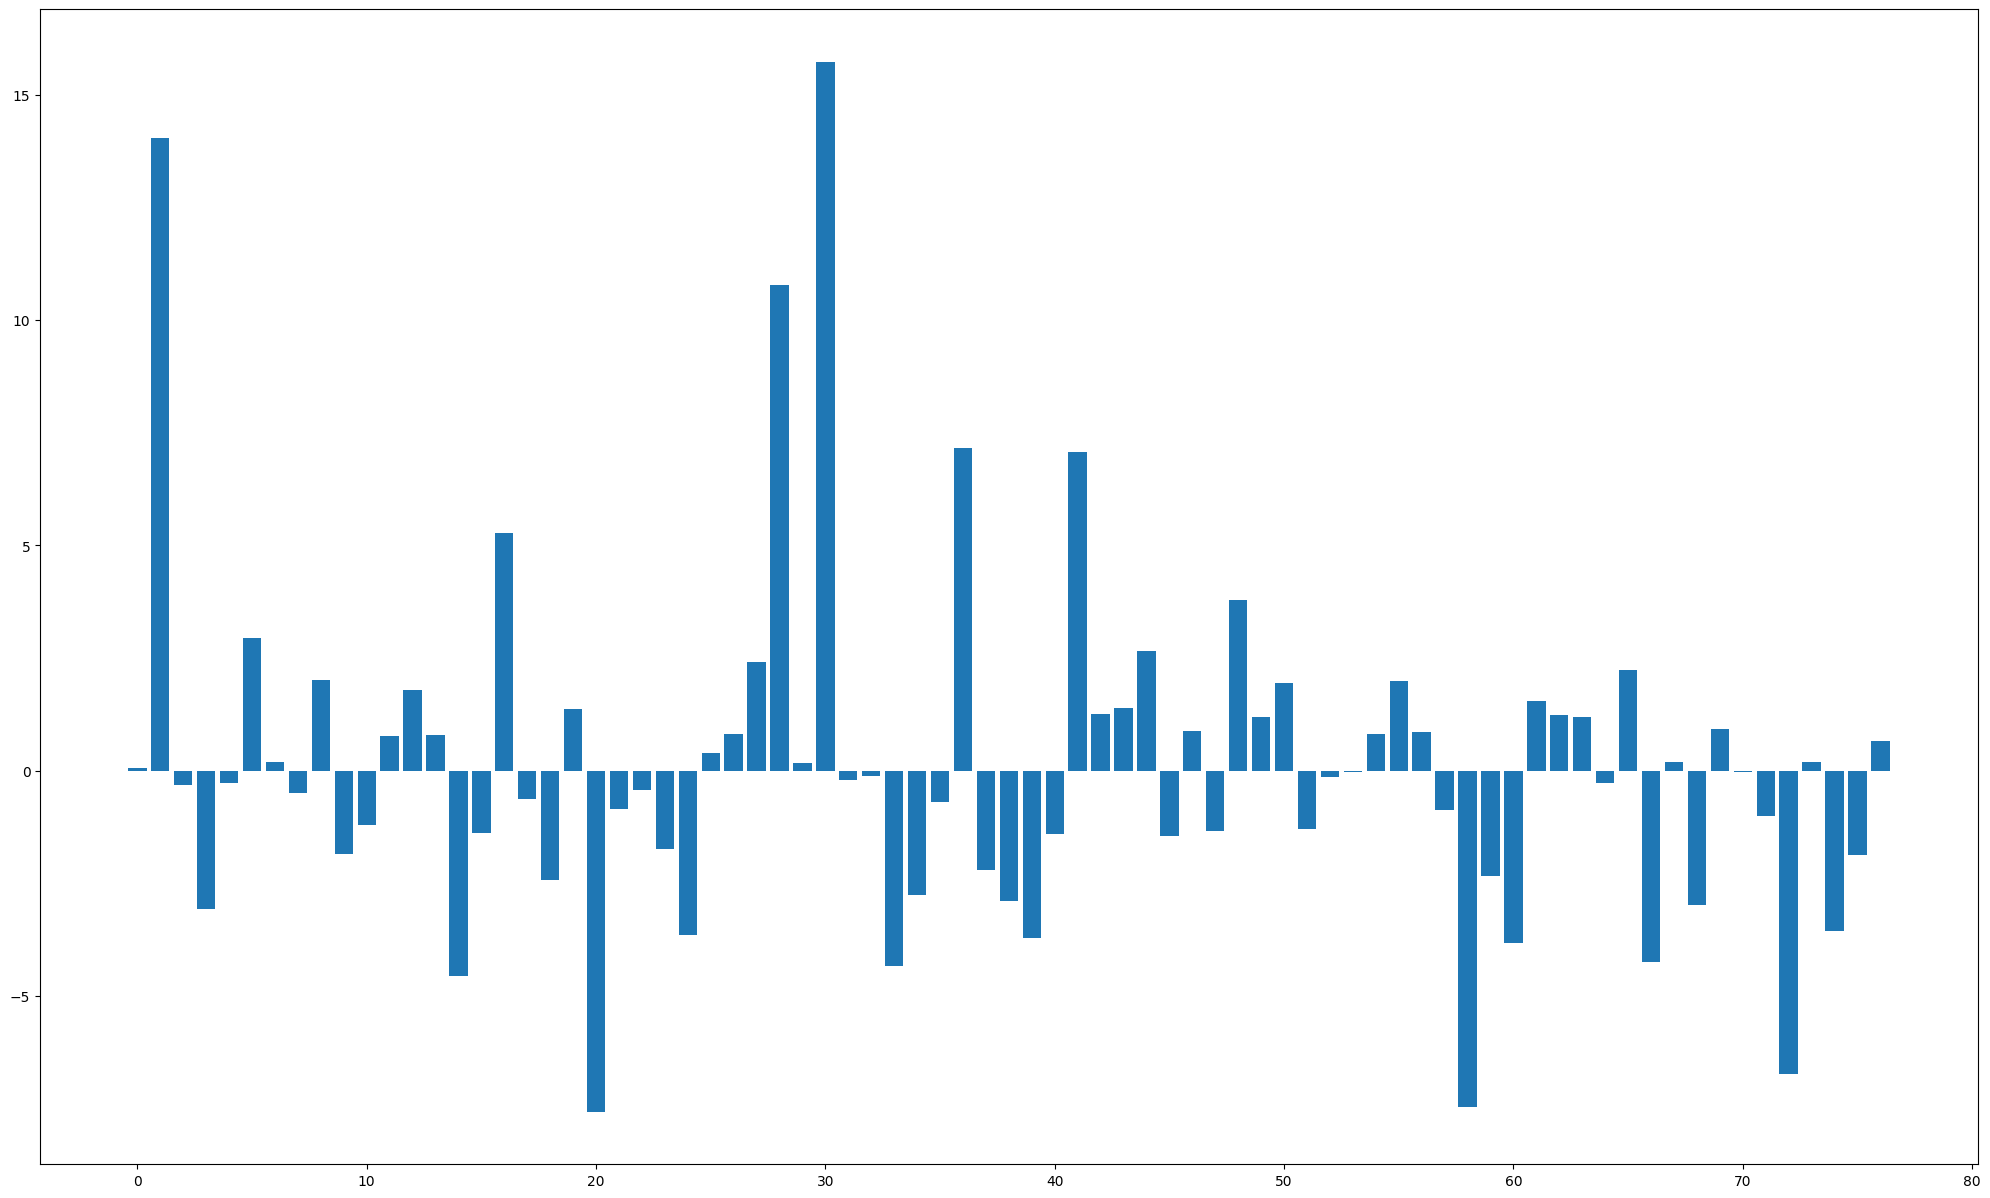

In [16]:
lr1 = LogisticRegression(solver='liblinear',multi_class='auto',C= 10, l1_ratio= 0.1)
lr1.fit(X, y1)
imp = lr1.coef_[0]       # Getting feature importance through coef_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[ -0.25892304   1.5335381    4.02444861   2.53922324   1.59709482
  -0.67297107   3.74008364   0.36017673  -3.22978202  -2.05081577
   6.10951538   7.80118503   7.15492999  -0.6499794    2.74387403
  -1.52856421  -7.64486517  -2.33694396   6.40491387  -5.49706792
  -9.22685616 -12.47743045  -0.40870521   1.27275948  -1.60989053
   0.02762115   4.12031454 -10.54019355  17.40261999  -3.32452301
  12.11096566  -1.13067685 -23.33353608   5.12209039  -0.2519983
   1.2059054    7.94854939  -2.22930302   1.10000426  -1.81348881
  -3.72907072  -2.16044762   2.15885347  -5.12219516  -1.91764887
   0.9623803   -2.439702    -2.65674464  -2.35149658  -1.01388542
   3.02928794   2.86578694  -8.52318411  -1.49055624   0.62619533
   6.98429822  -6.40436503  -3.67646813   5.85110299  -0.38317838
   9.49259917   0.74834697  -2.19447673  -1.38005281  -5.505873
   0.08907274   5.6512919   -2.14431141   3.49499876   3.29546735
  -1.49055624  -1.38583577  -0.47579747  -4.95250178  -0.77616182
  -1.67976009

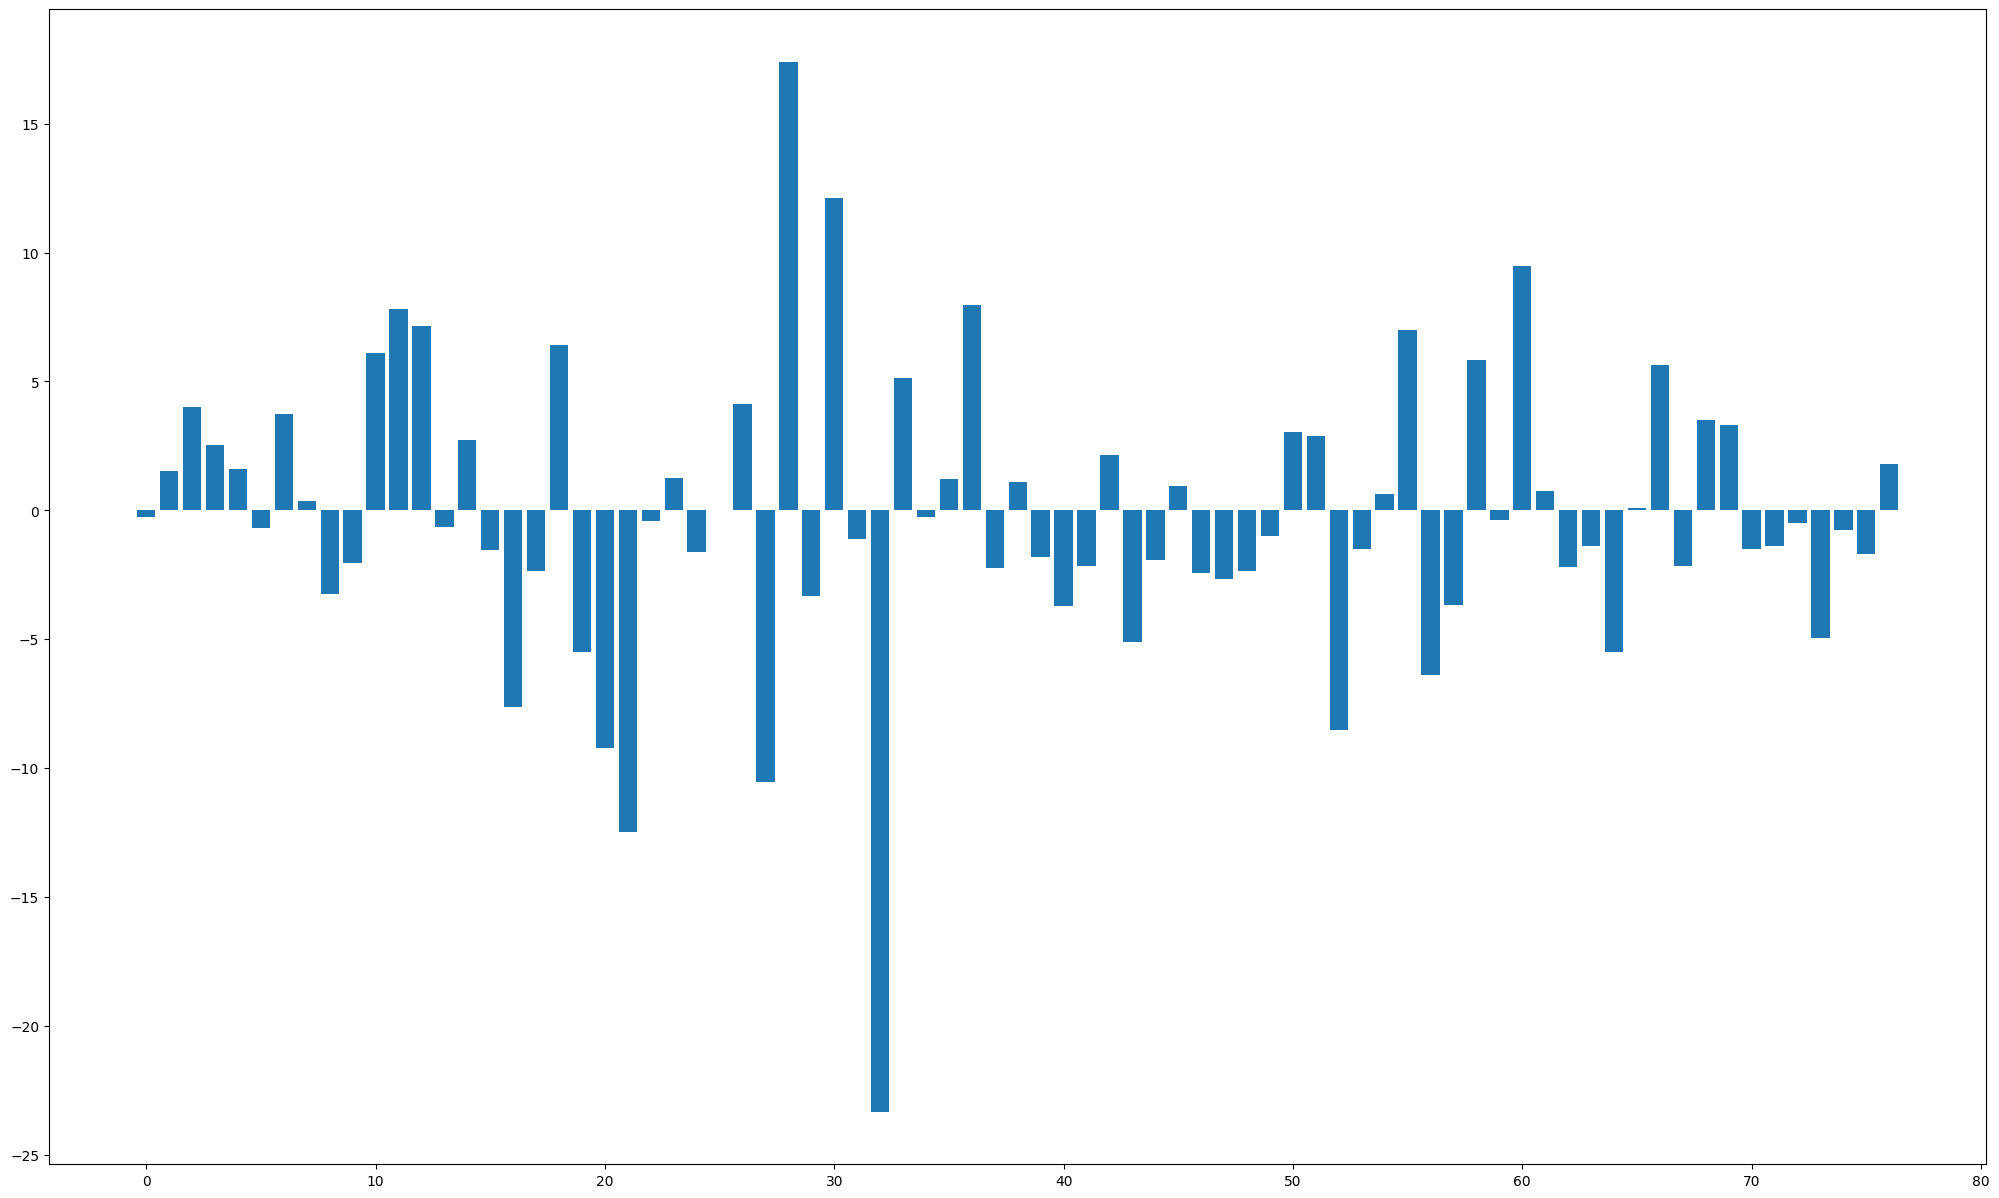

In [17]:
lr2 = LogisticRegression(solver='liblinear',multi_class='auto',C= 30, l1_ratio= 0.1)
lr2.fit(X, y2)
imp = lr2.coef_[0]       # Getting feature importance through coef_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()

In [18]:
mlp1 = MLPClassifier( max_iter=5000, activation = 'relu', solver='adam', random_state= 0, alpha = 0.01, hidden_layer_sizes = 50)
mlp1.fit(X, y1)
imp = mlp1.coefs_[0]       # Getting feature importance through coef_ attribute
print(imp)

[[ 2.18098555e-93  8.28091362e-03  7.04058889e-18 ...  7.10625323e-82
   9.03064968e-01  2.89077439e-92]
 [-4.47704756e-93 -5.88528383e-01  1.37631411e-10 ... -2.98673447e-74
   1.12290856e+00  8.19037358e-73]
 [-1.94935362e-91 -8.26404653e-02  2.67017798e-14 ... -3.29062498e-79
  -2.08976298e-01  4.48617474e-74]
 ...
 [ 3.19094565e-94 -3.41760534e-02 -1.52381758e-26 ...  2.28570670e-82
  -3.42292405e-02  1.39333641e-93]
 [ 1.54000480e-80 -8.12511367e-02  2.71214234e-11 ... -2.05940123e-84
   3.10314438e-01 -1.44800678e-77]
 [-7.01806955e-88  1.23237730e-01 -5.72374657e-07 ...  1.68685936e-88
  -1.16514062e-01  1.31803405e-87]]


In [19]:
mlp2 = MLPClassifier( max_iter=5000, activation = 'relu', solver='adam', random_state= 0, alpha = 0.01, hidden_layer_sizes = 20)
mlp2.fit(X, y2)
imp = mlp2.coefs_[0]       # Getting feature importance through coef_ attribute
print(imp)

[[ 2.51378938e-01  2.06452065e-02  9.58027073e-96 ... -7.05396373e-84
  -4.12952035e-01  1.66556608e-01]
 [ 3.60983435e-01  3.05969234e-02  4.69538219e-96 ...  6.05109496e-95
  -6.51998915e-01 -2.54659909e-01]
 [ 1.76793132e-01 -1.19216484e-05  2.86234796e-93 ... -6.37625321e-90
   1.22331693e-01 -1.57753517e-02]
 ...
 [-3.29015895e-01 -3.41360137e-10  5.49128744e-73 ... -1.41652689e-79
   3.28169165e-01  2.88199007e-01]
 [-1.76487170e-01  3.48568353e-08 -7.01757766e-88 ...  5.81876529e-88
  -2.71319695e-01  1.13878629e-01]
 [-3.73935858e-01  3.41366793e-02  7.96768394e-96 ...  9.72443766e-78
   7.74674547e-01  5.87499353e-01]]


[-0.47284506  7.9992619   0.06982979 -1.8649775   0.17079706  1.67900136
 -0.06003111 -0.26263574  1.45164517 -0.61874774 -0.74615325 -0.39472262
  1.79396014  0.2035148  -2.72290134 -1.0219571   3.65431536 -0.75240517
 -1.1790269   0.63535166 -4.27768219 -0.85832329 -0.63734274 -0.59565698
 -2.22966073 -0.08729797  0.53872293  1.15161136  7.5587263   0.57057929
 10.64447507 -0.95143777 -0.16811665 -2.69991315 -1.44308724 -0.58370044
  3.68282808 -2.37902871 -1.34485565 -2.908093   -0.7833274   3.65824174
  1.51302852  1.77850595  1.5065343  -0.51696228  0.5220689  -0.77260845
  2.00516736  0.28985294  0.90551814 -0.87213895  0.06821901  0.04792885
  1.12888979  1.867052    0.52567228 -0.38308273 -5.01957862 -1.08097571
 -2.64087044  2.41237318  1.04373305  0.22668224  0.10241778  1.53221386
 -2.53825214  1.04918025 -1.7513866   0.83717955  0.04792885 -0.72158902
 -3.67172899 -0.03918111 -2.05198424 -0.73737024  0.51259757]


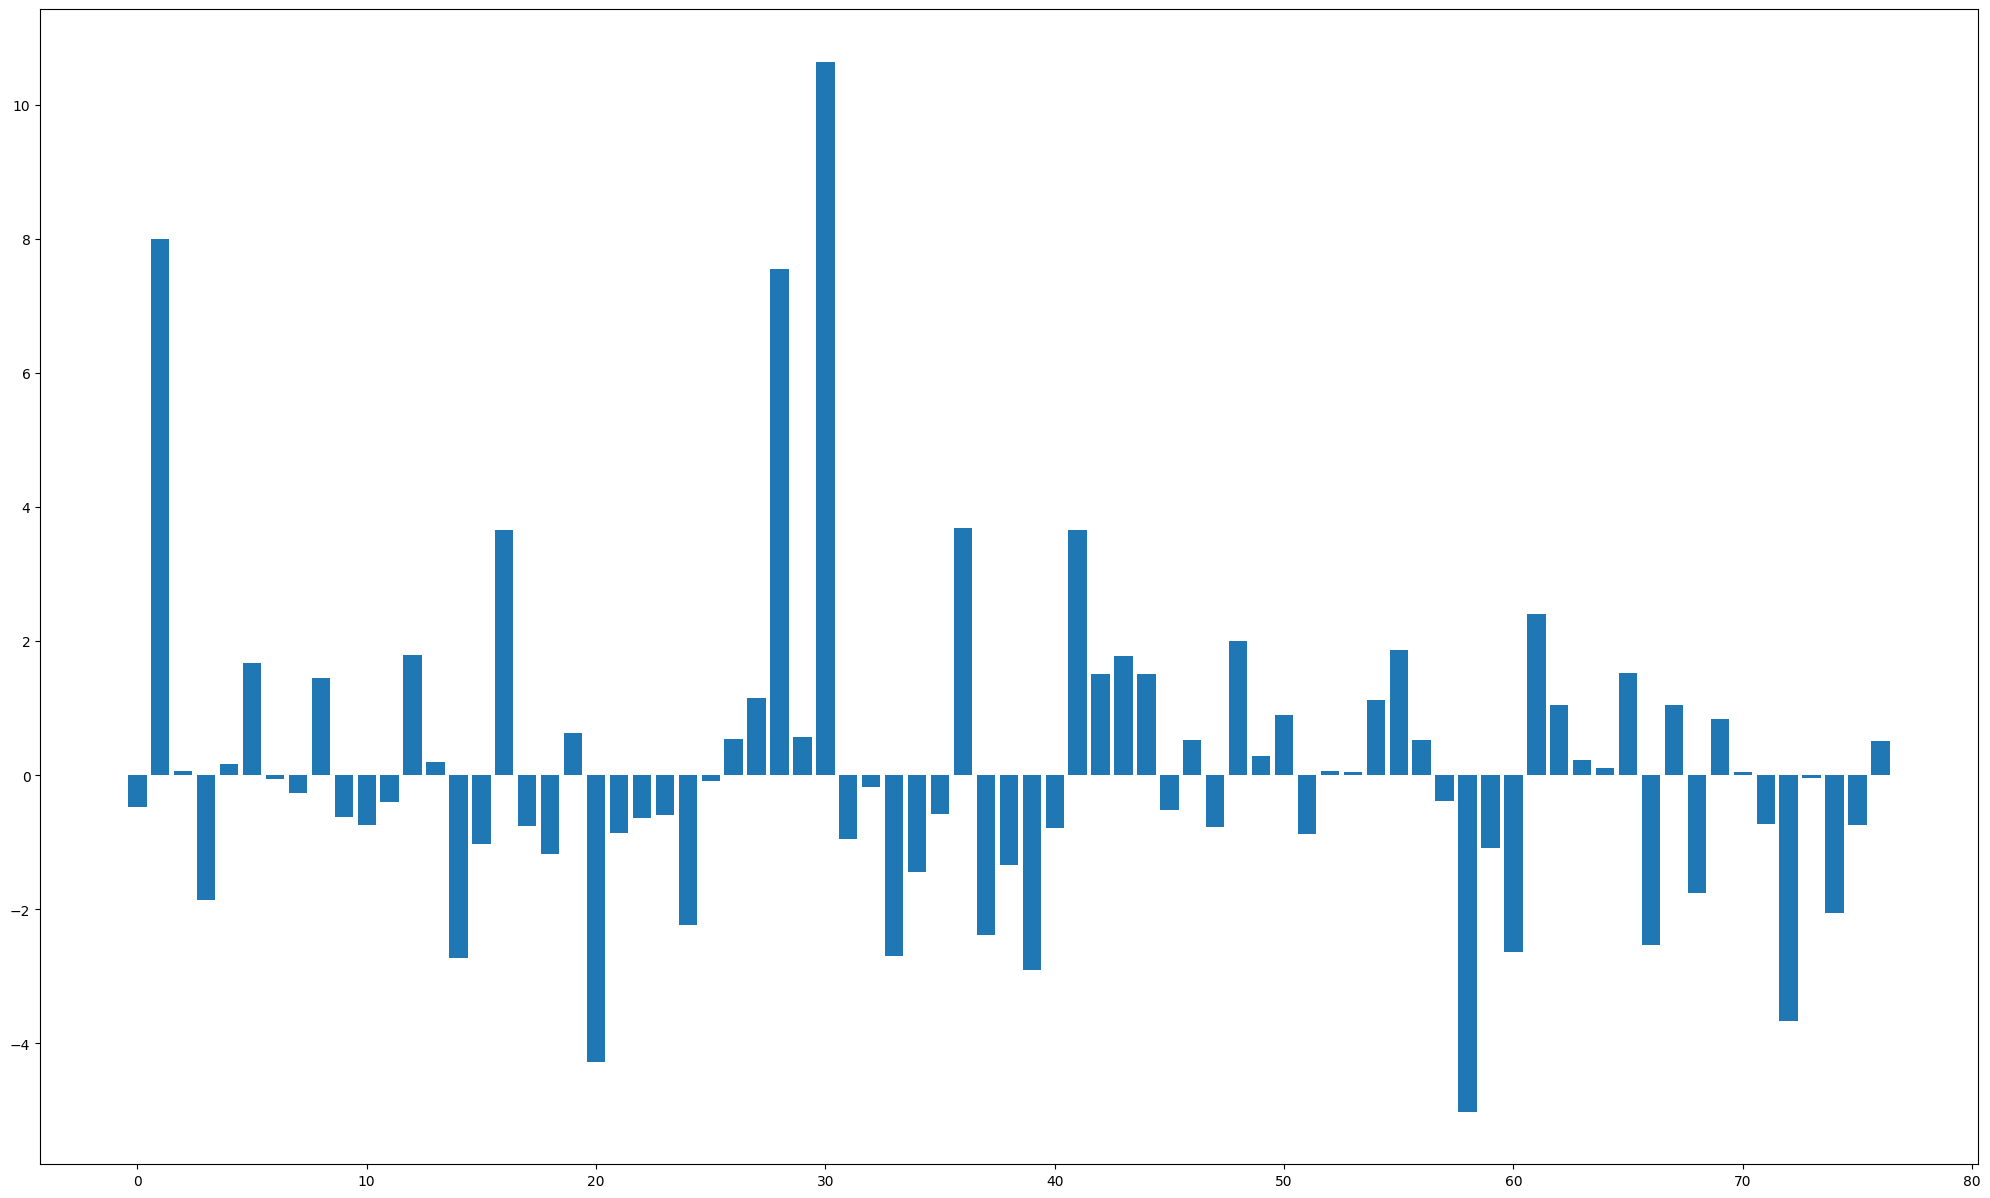

In [20]:
svm1 = SVC(gamma='auto', C = 4, degree = 3, kernel = 'linear')
svm1.fit(X, y1)
imp = svm1.coef_[0]       # Getting feature importance through coef_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()

[ 0.31581017  0.03354179  0.03517864 -0.27032109  0.25849162  0.04905811
  0.03978737 -0.44421678  0.00171525 -0.33140452  0.89244718  0.1073531
  0.18223509  0.03855317 -0.05375269 -0.03509206 -0.14089936  1.19816214
  0.10226205 -0.44243655  0.38578185  0.09313436  0.04714465 -0.23744969
  0.57708055 -0.21118824  0.10391831  0.00402115  0.2429563   0.01104353
  0.01123769 -0.4564068  -1.34868919 -0.06762784 -0.34361184 -0.29094472
  0.09338627 -0.02900894  0.0741159   0.46159892  0.04466171 -0.07948956
 -0.41841105  0.02556404 -0.70029305  0.15207402 -0.10557354  0.2671445
  0.41674256 -0.01881098 -0.02394697  0.12006441 -0.04789764 -0.05786105
  0.01193012 -0.12947707 -0.17284464  0.11938376  0.26117925  0.10819317
 -0.09627557  0.17335849  0.03106687 -0.32132481 -0.00738184 -0.16594202
 -0.19910273 -0.09093285 -0.01542813  0.15815743 -0.05786105  0.11917508
  0.31026987  0.02529484 -0.1450086   0.02245481  1.68826975]


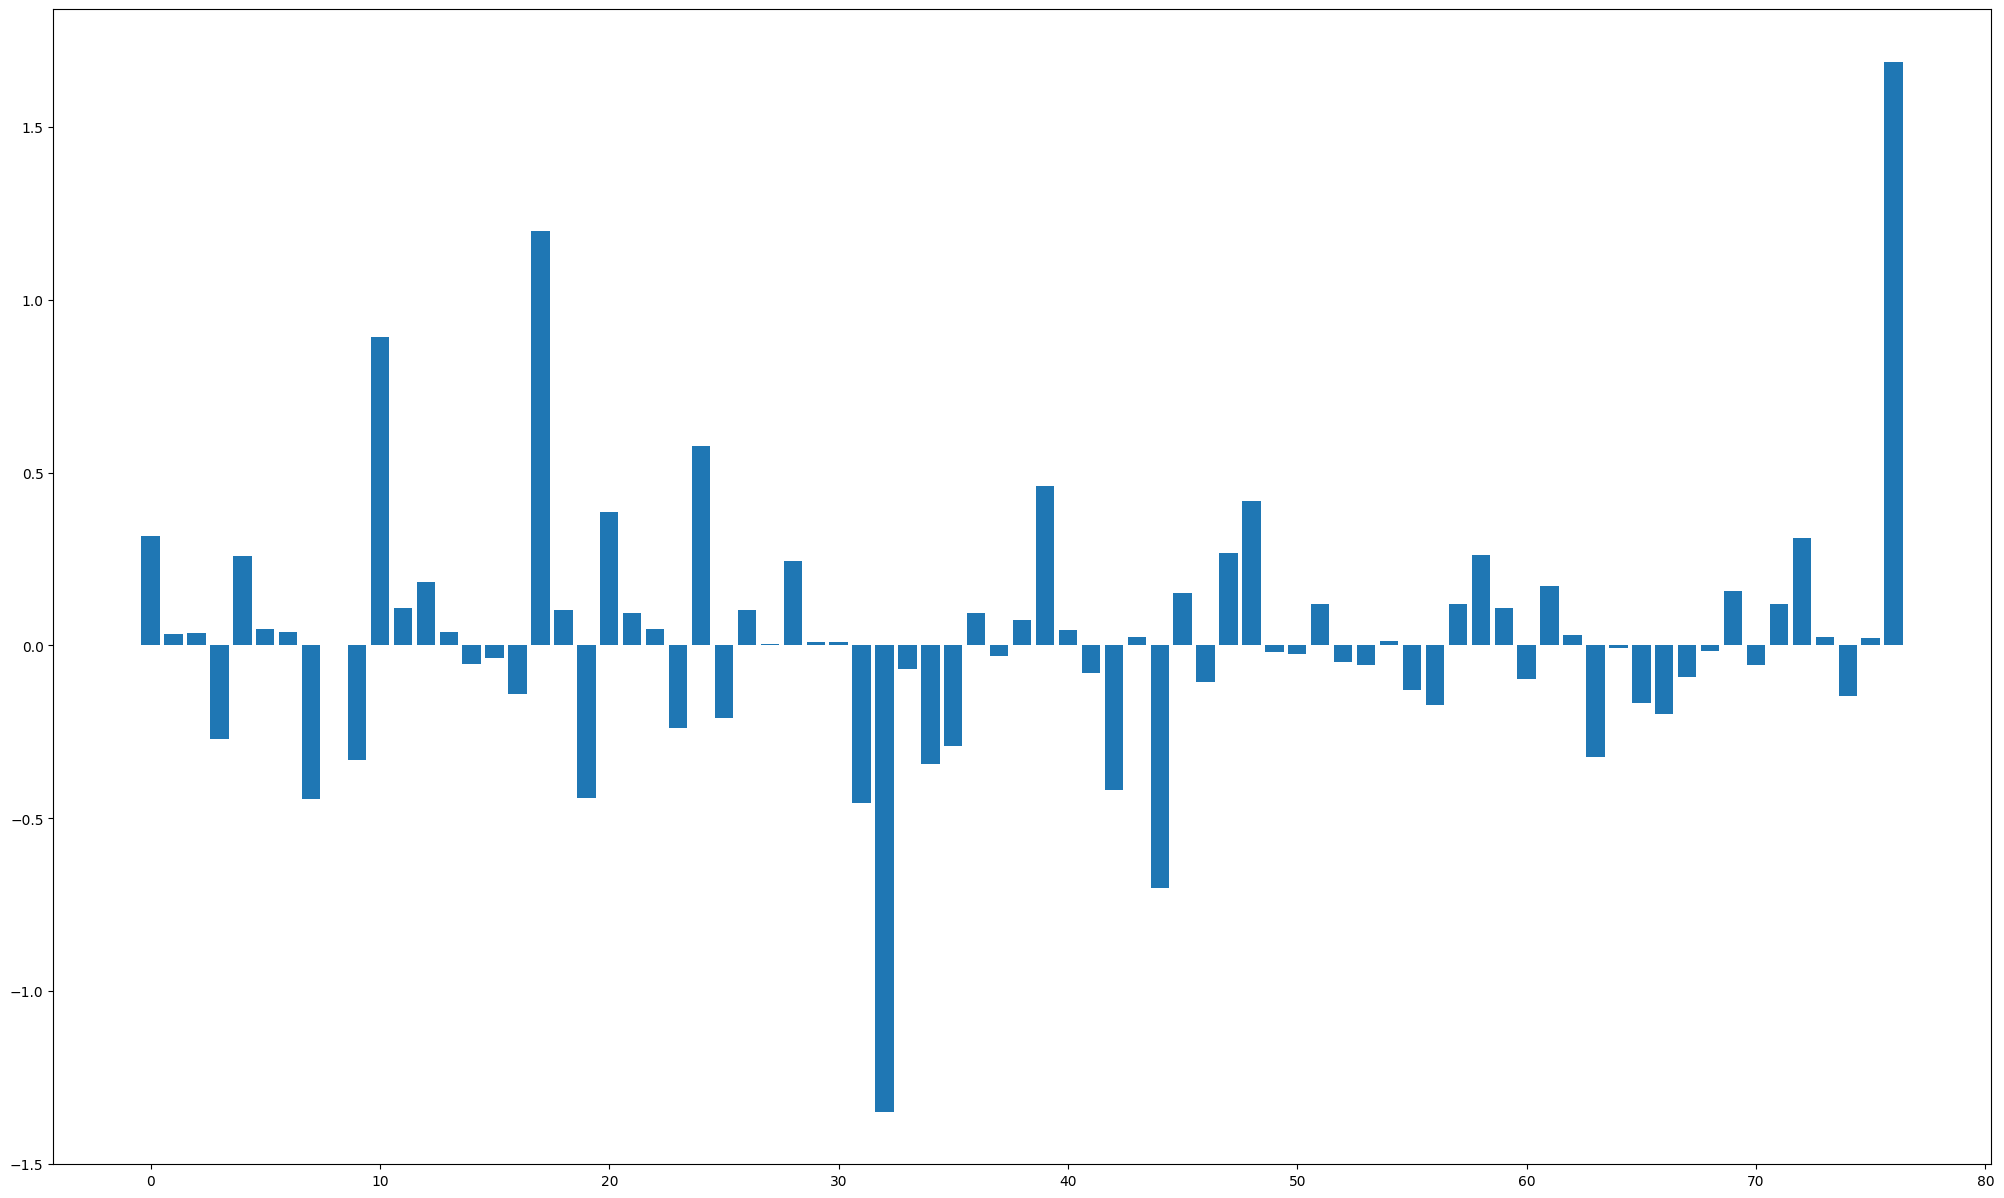

In [21]:
svm2 = SVC(gamma='auto', C = 10, degree = 3, kernel = 'linear')
svm2.fit(X, y2)
imp = svm2.coef_[0]       # Getting feature importance through coef_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()

[0.01724122 0.06674816 0.00988129 0.00864543 0.01237041 0.01076255
 0.00495733 0.0108813  0.01432002 0.00836422 0.01092696 0.0042078
 0.00580388 0.00640254 0.01579796 0.00645963 0.0054024  0.00904497
 0.0103362  0.00885117 0.016684   0.0080131  0.0077042  0.00732685
 0.0092267  0.00780335 0.00585066 0.00345513 0.00895211 0.00729765
 0.10228758 0.00604896 0.00947372 0.02371473 0.02086389 0.01663065
 0.01395865 0.01613572 0.01446717 0.01190443 0.01195869 0.01175136
 0.00986343 0.00601356 0.00403606 0.00912705 0.02325704 0.00711878
 0.02323729 0.01100138 0.03196793 0.00671828 0.00640382 0.00899467
 0.00681689 0.00663686 0.0381324  0.00800148 0.02868794 0.00900743
 0.0089455  0.00818239 0.00661339 0.01034954 0.00405982 0.02081026
 0.0073281  0.0043277  0.00707048 0.00810195 0.01172688 0.00451191
 0.0160482  0.01834118 0.00808659 0.00821071 0.01334838]


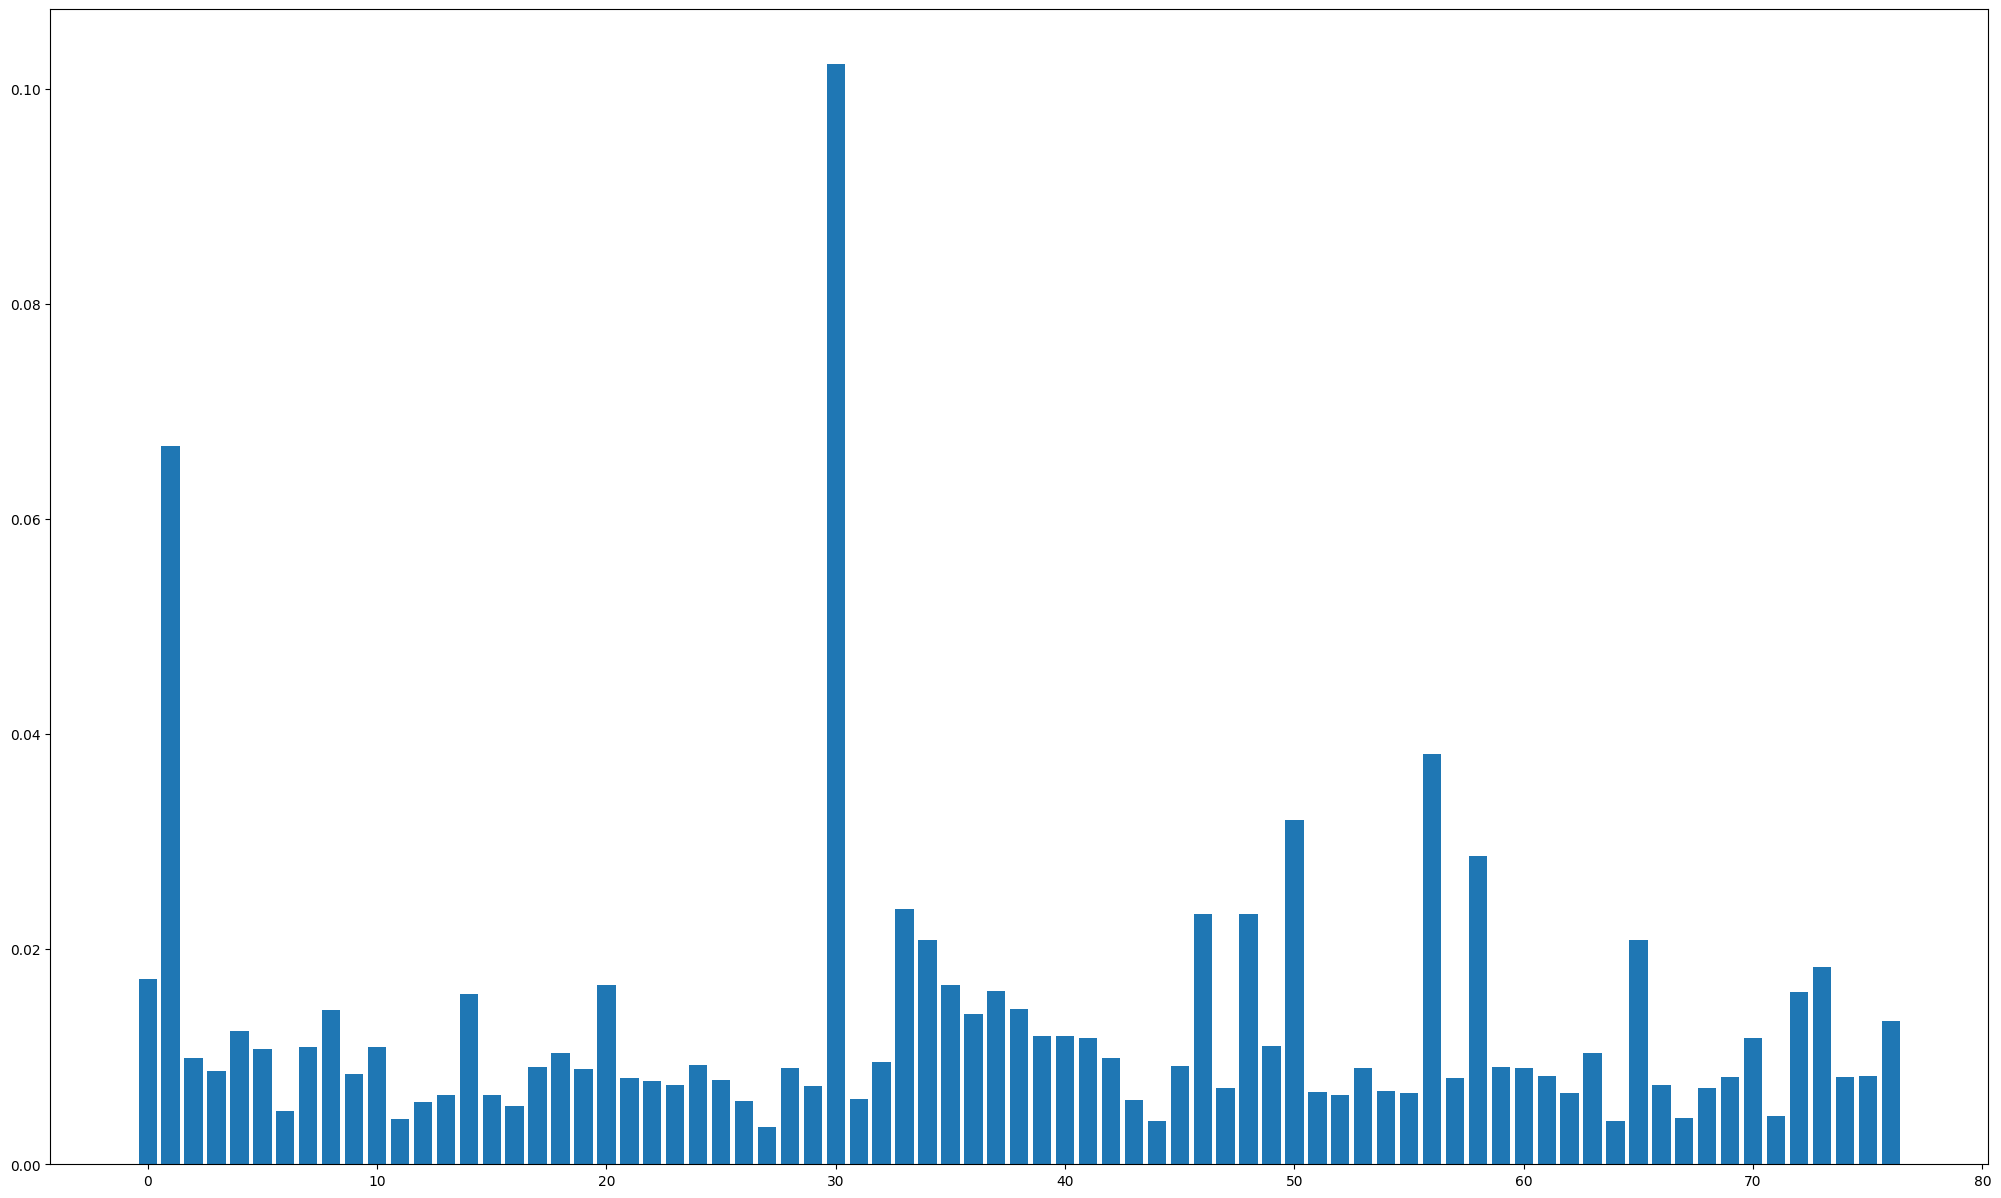

In [22]:
rfc1 =  RandomForestClassifier(max_depth = 50, n_estimators = 150)
rfc1.fit(X, y1)
imp = rfc1.feature_importances_     # Getting feature importance through feature_importances_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()

[0.01882563 0.01143682 0.00639933 0.00279581 0.00232612 0.01117786
 0.01043013 0.0324442  0.00467987 0.01291784 0.06336778 0.00729121
 0.00648346 0.00792285 0.00480382 0.00640003 0.00311508 0.02326268
 0.00470568 0.00413107 0.02545647 0.00462259 0.00192047 0.00535493
 0.00710956 0.00443326 0.00569397 0.00268052 0.00194553 0.00435228
 0.00578681 0.00344876 0.07011313 0.00665093 0.03151801 0.01377644
 0.01425292 0.00409718 0.00603099 0.0402745  0.00426541 0.01002966
 0.01798268 0.01684095 0.00921882 0.01666687 0.02896729 0.01102328
 0.0126606  0.00551083 0.00622301 0.00734327 0.01223817 0.02213138
 0.00811781 0.01373936 0.01369154 0.01003361 0.01308459 0.0073582
 0.01864311 0.006234   0.0061065  0.01152293 0.01590849 0.04785945
 0.01026057 0.00729634 0.00445503 0.00409884 0.01843192 0.00367381
 0.00798837 0.00973861 0.00445044 0.00699352 0.0647742 ]


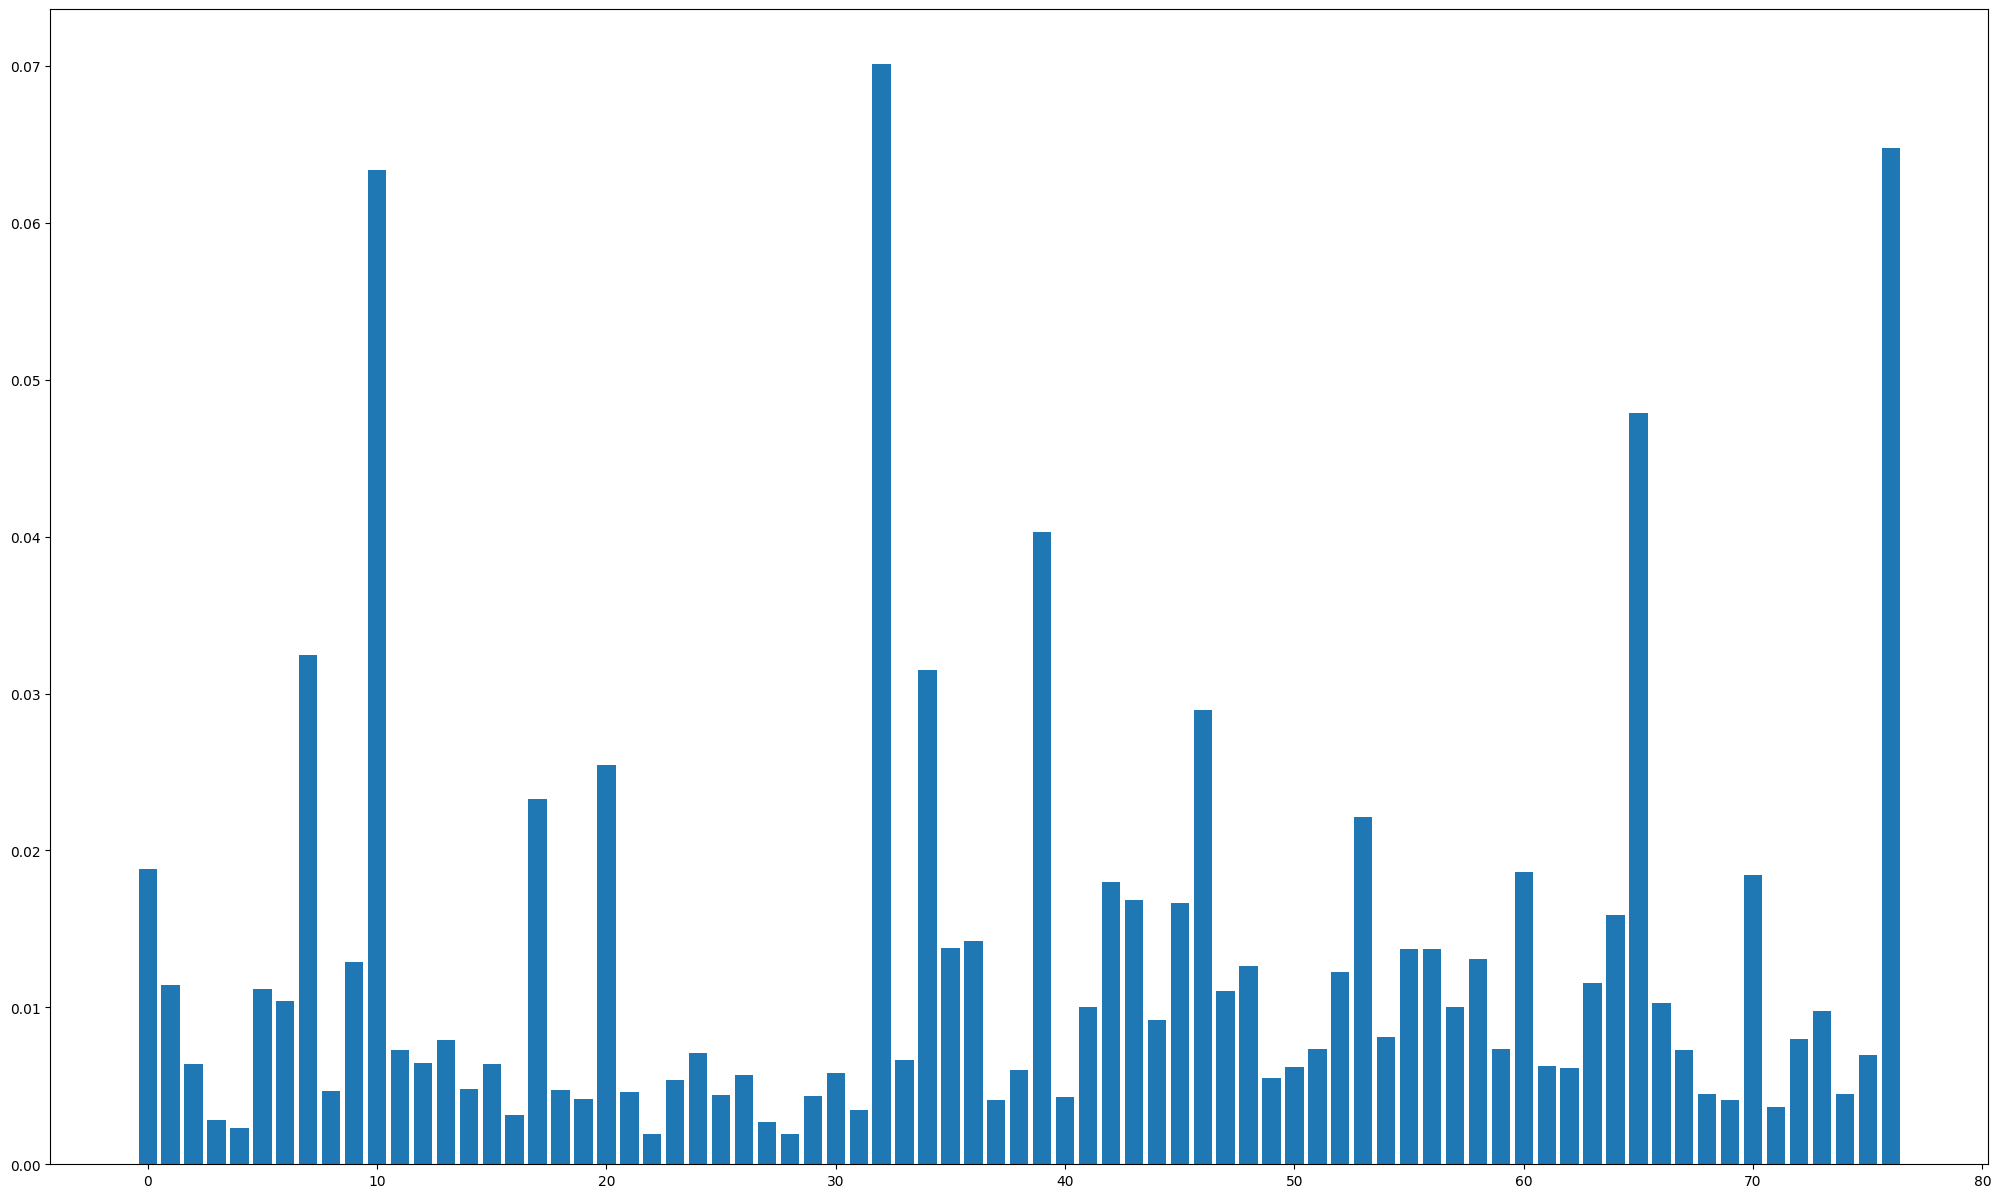

In [23]:
rfc2 =  RandomForestClassifier(max_depth = 40, n_estimators = 50)
rfc2.fit(X, y2)
imp = rfc2.feature_importances_       # Getting feature importance through feature_importances_ attribute
print(imp)

plt.figure(figsize=(25, 15))
plt.bar([X for X in range(len(imp))], imp)
plt.show()

Observations:
1. In each model for binary and four class data, few features have high relative scores, they are relevant to the target.
2. Most of the features have low relative scores, they can be eliminated using PCA.


# Reducing the number of features

In [24]:
print(np.shape(X))

(762, 77)


In [25]:
# Using Principle Component Analysis for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 37)         # Reducing 77 features to 37
X = pca.fit_transform(X)

In [26]:
print(np.shape(X))

(762, 37)


# Training and Validation on reduced data on best hyperparameters

In [27]:
# Performing five fold cross validation on reduced dataset
# Performing GridSearchCV in different models
# Initializing arrays to display parameters
score1 = []
score2 = []

# GridSearchCV
for model_name, mp in model_params.items():
    clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)    # For Binary Data 5-fold cross validation
    clf2 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)    # For four class data 5-fold cross validation
    clf1.fit(X, y1)
    clf2.fit(X, y2)
    score1.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })

    score2.append({
        'model': model_name,
        'best_score': clf2.best_score_,
        'best_params': clf2.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

In [28]:
print(np.array(score1))

[{'model': 'logistic_regression', 'best_score': 0.7426986584107327, 'best_params': {'C': 20, 'l1_ratio': 0.1}}
 {'model': 'MLPClassifier', 'best_score': 0.7507739938080495, 'best_params': {'alpha': 0.0001, 'hidden_layer_sizes': 60}}
 {'model': 'svm', 'best_score': 0.7702786377708979, 'best_params': {'C': 4, 'degree': 3, 'kernel': 'linear'}}
 {'model': 'random_forest', 'best_score': 0.7335569315445476, 'best_params': {'max_depth': 40, 'n_estimators': 100}}]


In [29]:
print(np.array(score2))

[{'model': 'logistic_regression', 'best_score': 0.6796439628482972, 'best_params': {'C': 30, 'l1_ratio': 0.1}}
 {'model': 'MLPClassifier', 'best_score': 0.7308823529411764, 'best_params': {'alpha': 0.0001, 'hidden_layer_sizes': 60}}
 {'model': 'svm', 'best_score': 0.7308995528035775, 'best_params': {'C': 8, 'degree': 3, 'kernel': 'rbf'}}
 {'model': 'random_forest', 'best_score': 0.7307791537667699, 'best_params': {'max_depth': 50, 'n_estimators': 150}}]


In [30]:
# Again training model 1 on reduced data set and best hyperparameters
lr1 = LogisticRegression(solver='liblinear',multi_class='auto',C= 20, l1_ratio= 0.1)
lr1.fit(X, y1)
mlp1 = MLPClassifier( max_iter=5000, activation = 'relu', solver='adam', random_state= 0, alpha = 0.0001, hidden_layer_sizes = 30)
mlp1.fit(X, y1)
svm1 = SVC(gamma='auto', C = 4, degree = 3, kernel = 'linear')
svm1.fit(X, y1)
rfc1 =  RandomForestClassifier(max_depth = 10, n_estimators = 100)
rfc1.fit(X, y1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


RandomForestClassifier(max_depth=10)

In [31]:
# Again training model 2 on reduced data set and best hyperparameters
lr2 = LogisticRegression(solver='liblinear',multi_class='auto',C= 30, l1_ratio= 0.1)
lr2.fit(X, y2)
mlp2 = MLPClassifier( max_iter=5000, activation = 'relu', solver='adam', random_state= 0, alpha = 0.01, hidden_layer_sizes = 50)
mlp2.fit(X, y2)
svm2 = SVC(gamma='auto', C = 8, degree = 3, kernel = 'rbf')
svm2.fit(X, y2)
rfc2 =  RandomForestClassifier(max_depth = 50, n_estimators = 100)
rfc2.fit(X, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


RandomForestClassifier(max_depth=50)

# Testing the model on test dataset

In [32]:
test_dataset = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')      # Reading the training data directly
X_test = test_dataset.iloc[:, :-2].values
y1_test = test_dataset.iloc[:, -2].values      # Binary data : model-1
y2_test = test_dataset.iloc[:, -1].values      # Four class data : model-2
display(test_dataset)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [33]:
# Label encoding of categorical data of test dataset
le3=LabelEncoder()
y1_test = le3.fit_transform(y1_test)

le4=LabelEncoder()
y2_test= le4.fit_transform(y2_test)


In [34]:
# Taking care of missing data of test dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X_test)
X_test = imputer.transform(X_test)
print(X_test)

[[0.62758167 0.95418701 0.44695832 ... 0.15810257 0.18383823 1.64998272]
 [0.65125332 0.96202051 0.46496392 ... 0.16340471 0.18383823 1.63898847]
 [0.64434594 0.9671791  0.47005565 ... 0.1602933  0.18383823 1.56492482]
 ...
 [0.21613419 0.36405751 0.24169329 ... 0.25700365 0.30481121 1.14220463]
 [0.21236948 0.36995984 0.23903615 ... 0.2558521  0.30848367 1.11271806]
 [0.25728988 0.43262817 0.28968935 ... 0.27804804 0.32608696 1.17178474]]


In [35]:
print(np.shape(X_test))

(225, 77)


In [36]:
# Dimensionality reduction of test dataset
X_test = pca.transform(X_test)

In [37]:
print(np.shape(X_test))

(225, 37)


In [38]:
y_pred1 = lr1.predict(X_test)
y_pred2 = mlp1.predict(X_test)
y_pred3 = svm1.predict(X_test)
y_pred4 = rfc1.predict(X_test)

In [39]:
y_pred5 = lr2.predict(X_test)
y_pred6 = mlp2.predict(X_test)
y_pred7 = svm2.predict(X_test)
y_pred8 = rfc2.predict(X_test)

# Confusion matrix and accuracy score for each model

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Linear Classifier Binary data
print(confusion_matrix(y1_test, y_pred1))
accuracy_score(y1_test, y_pred1)

[[101  34]
 [ 13  77]]


0.7911111111111111

In [41]:
# Neural Network Binary data
print(confusion_matrix(y1_test, y_pred2))
accuracy_score(y1_test, y_pred2)

[[117  18]
 [  8  82]]


0.8844444444444445

In [42]:
# SVM Binary data
print(confusion_matrix(y1_test, y_pred3))
accuracy_score(y1_test, y_pred3)

[[108  27]
 [ 17  73]]


0.8044444444444444

In [43]:
# Random forest Binary data
print(confusion_matrix(y1_test, y_pred4))
accuracy_score(y1_test, y_pred4)

[[127   8]
 [ 34  56]]


0.8133333333333334

In [44]:
# Linear Classifier four class data
print(confusion_matrix(y2_test, y_pred5))
accuracy_score(y2_test, y_pred5)

[[39  0 21  0]
 [ 0 45  0 15]
 [27  0 33  0]
 [ 0  3  0 42]]


0.7066666666666667

In [45]:
# Neural Network four class data
print(confusion_matrix(y2_test, y_pred6))
accuracy_score(y2_test, y_pred6)

[[42  0 18  0]
 [ 0 42  0 18]
 [16  0 44  0]
 [ 0  8  0 37]]


0.7333333333333333

In [46]:
# SVM four class data
print(confusion_matrix(y2_test, y_pred7))
accuracy_score(y2_test, y_pred7)

[[41  0 19  0]
 [ 0 48  0 12]
 [13  0 47  0]
 [ 0 14  0 31]]


0.7422222222222222

In [47]:
# Random Forest four class data
print(confusion_matrix(y2_test, y_pred8))
accuracy_score(y2_test, y_pred8)

[[41  0 19  0]
 [ 0 45  0 15]
 [21  0 39  0]
 [ 0  3  0 42]]


0.7422222222222222

# Observations & Thoughts

1. For given training data without any reduction :
*  Model-1 (Binary data) gives best score 0.766 and best model 'SVM'.
*  Model-2 (four class data) gives best score 0.761 and best model 'Neural Network'.

2. Most of the features are highly correlated (has low relative score). We eliminate them using PCA technique. Number of features is brought to 37.

3. After PCA reduction :
*   Model-1 gives best score 0.77 and best model 'SVM'.
*   Model-2 gives best score 0.7321 and best model 'Random Forest'.

4. On testing the data with test dataset :

*   Model-1 gives best score 0.8844 and best model 'Neural Network'
*   Model-2 gives best score 0.7422 and best model 'SVM'







# References



1.   https://machinelearningmastery.com/calculate-feature-importance-with-python/
2.   https://www.pythonpool.com/matplotlib-figsize/#:~:text=In%20Matplotlib%20all%20the%20diagrams,change%20both%20of%20these%20values.
3. https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=1008s
4. https://scikit-learn.org/stable/modules/classes.html
5. Discussion with peers:
     Name - Ankit Singh /
     Roll Number - 213070029